# Sentiment Analysis of Description, Tags and Titles

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the datasets into individual dataframes

In [2]:
df_usa=pd.read_csv("../data/USvideos.csv")
df_ca=pd.read_csv("../data/CAvideos.csv")
df_in=pd.read_csv("../data/INvideos.csv")
df_gb=pd.read_csv("../data/GBvideos.csv")

### Working on USA dataset

In the dataset, the Trending Date and Published Time are not in the Unix date-time format. Let's fix this first.

In [3]:
df_usa['trending_date'] = pd.to_datetime(df_usa['trending_date'], format='%y.%d.%m')
df_usa['publish_time'] = pd.to_datetime(df_usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df_usa.insert(4, 'publish_date', df_usa['publish_time'].dt.date)
df_usa['publish_time'] = df_usa['publish_time'].dt.time
df_usa['publish_date']=pd.to_datetime(df_usa['publish_date'])

Heatmap to see the correlation between the likes, dislikes, comments, and views

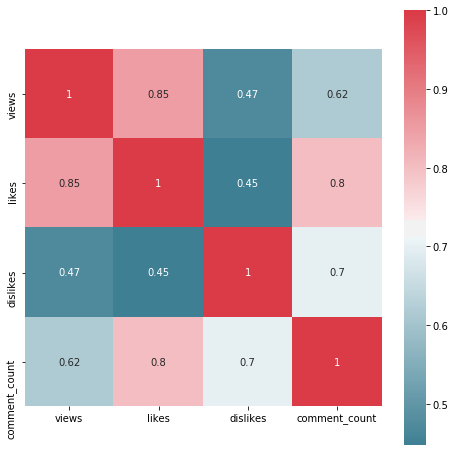

In [4]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df_usa[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

#### In the above matrix, for USA dataset, the columns with :-

High Correlation - Views and Likes, Comment_count and Likes <br>
Medium Correlation - Views and Comment_Count, Views and Comment_Count, Dislikes and Comment_count<br>
Low Correlation - Likes and Dislikes<br>

Since, a video could be in trending for several days. There might be multiple rows of a particular video. In order to calculate the total Views, Comments, Likes, Dislikes of a video, we need to groupby with video_id. The below script will give you the total no. of views/comments/likes, and dislikes of a video.

In [5]:
usa_video_views=df_usa.groupby(['video_id'])['views'].agg('sum')
usa_video_likes=df_usa.groupby(['video_id'])['likes'].agg('sum')
usa_video_dislikes=df_usa.groupby(['video_id'])['dislikes'].agg('sum')
usa_video_comment_count=df_usa.groupby(['video_id'])['comment_count'].agg('sum')

To get the numbers of videos on which the 'Comments Disabled/ Rating Disabled/Video Error'. We need to remove the duplicates to get the correct numbers otherwise there will be redundancy.

In [6]:
df_usa_single_day_trend=df_usa.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_usa_multiple_day_trend= df_usa.drop_duplicates(subset='video_id',keep='first',inplace=False)

frames = [df_usa_single_day_trend, df_usa_multiple_day_trend]
df_usa_without_duplicates=pd.concat(frames)

df_usa_comment_disabled=df_usa_without_duplicates[df_usa_without_duplicates['comments_disabled']==True].describe()
df_usa_rating_disabled=df_usa_without_duplicates[df_usa_without_duplicates['ratings_disabled']==True].describe()
df_usa_video_error=df_usa_without_duplicates[df_usa_without_duplicates['video_error_or_removed']==True].describe()

How many videos were trended only for a single day?

In [7]:
df_usa_single_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


Videos that were trended for more than 1 day

In [8]:
df_usa_multiple_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Which video trended on maximum days and what is the title, likes, dislikes, comments, and views.

Text(0.5,1,'Top 5 Videos that trended maximum days in USA')

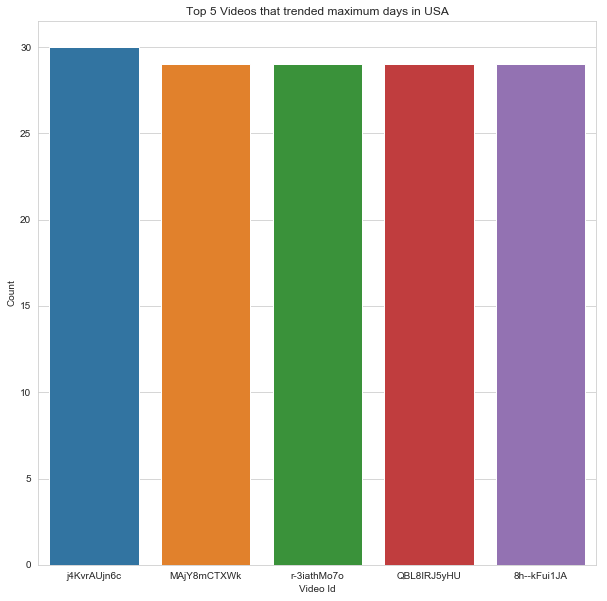

In [9]:
df_usa_which_video_trended_maximum_days=df_usa.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

Video which were trended for maximum days

The maximum no. of days a video trended is 30 i.e. for 'j4KvrAUjn6c' video id. Now, the below script gives its likes,dislikes, views, and comments.

In [10]:
df_usa_maximum_views=usa_video_views['j4KvrAUjn6c']
df_usa_maximum_likes=usa_video_likes['j4KvrAUjn6c']
df_usa_maximum_dislikes=usa_video_dislikes['j4KvrAUjn6c']
df_usa_maximum_comment=usa_video_comment_count['j4KvrAUjn6c']

#### Which video took maximum no of days to be a Trending Video:

Now, the below script will calculate the no of days taken by a video to be a Trending Video. The graph will show the top 5 videos that took maximum no. of days to be a trending video.

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Maximum no of days taken by 5 videos to be popular in USA')

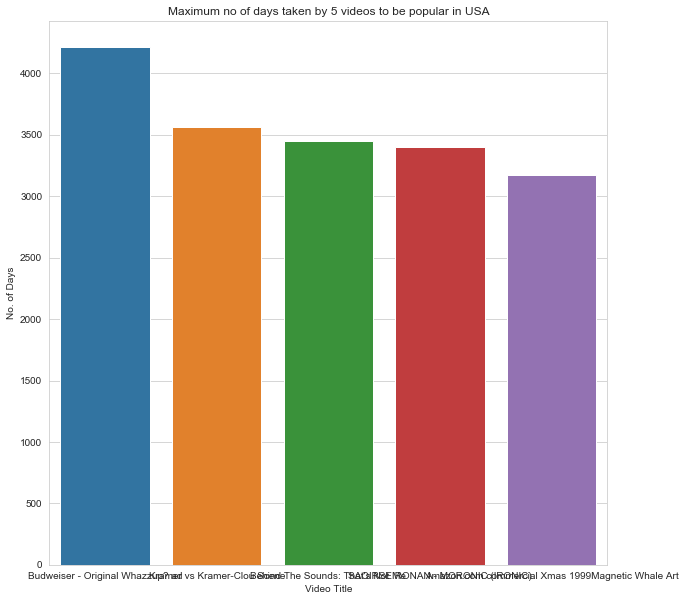

In [11]:
df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] =df_usa_multiple_day_trend['trending_date'] - df_usa_multiple_day_trend['publish_date']
df_usa_multiple_day_trend['Days_taken_to_be_trending_video']= df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')
usa_no_of_days_take_trend=df_usa_multiple_day_trend.sort_values(by='Days_taken_to_be_trending_video',ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_no_of_days_take_trend['title'],y=usa_no_of_days_take_trend['Days_taken_to_be_trending_video'], data=usa_no_of_days_take_trend)
plt.xlabel("Video Title")
plt.ylabel("No. of Days")
plt.title("Maximum no of days taken by 5 videos to be popular in USA")

It is strange to observe that some videos took more than 10 years to come into the trending category

#### Top 5 Trending Channel in USA

Text(0.5,1,'Top 5 Trending Channel in USA')

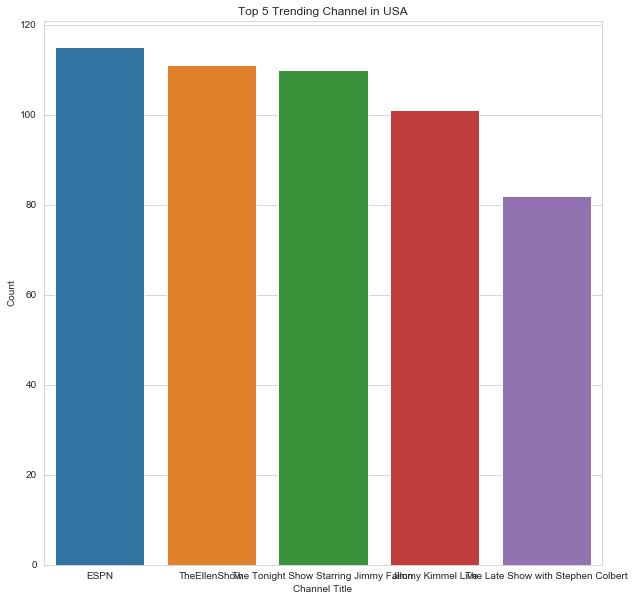

In [12]:
usa_trending_channel=df_usa_without_duplicates.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_trending_channel['channel_title'],y=usa_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in USA")

Top 5 USA_Category_IDs

C:\Users\chait\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Top 5 Category IDs for USA')

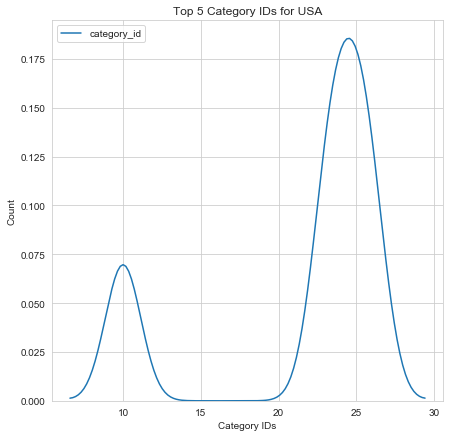

In [13]:
usa_category_id=df_usa_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(usa_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for USA")

This graph shows that the maximum category_id is 24 and the Category_Ids are majorly between 22-27

In [14]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

#### Frequently used words in title column

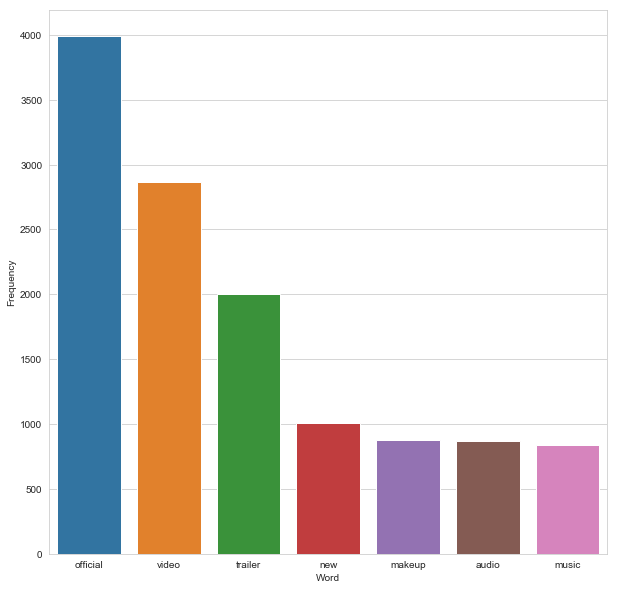

In [15]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df_usa['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

Building a wordcloud for those words

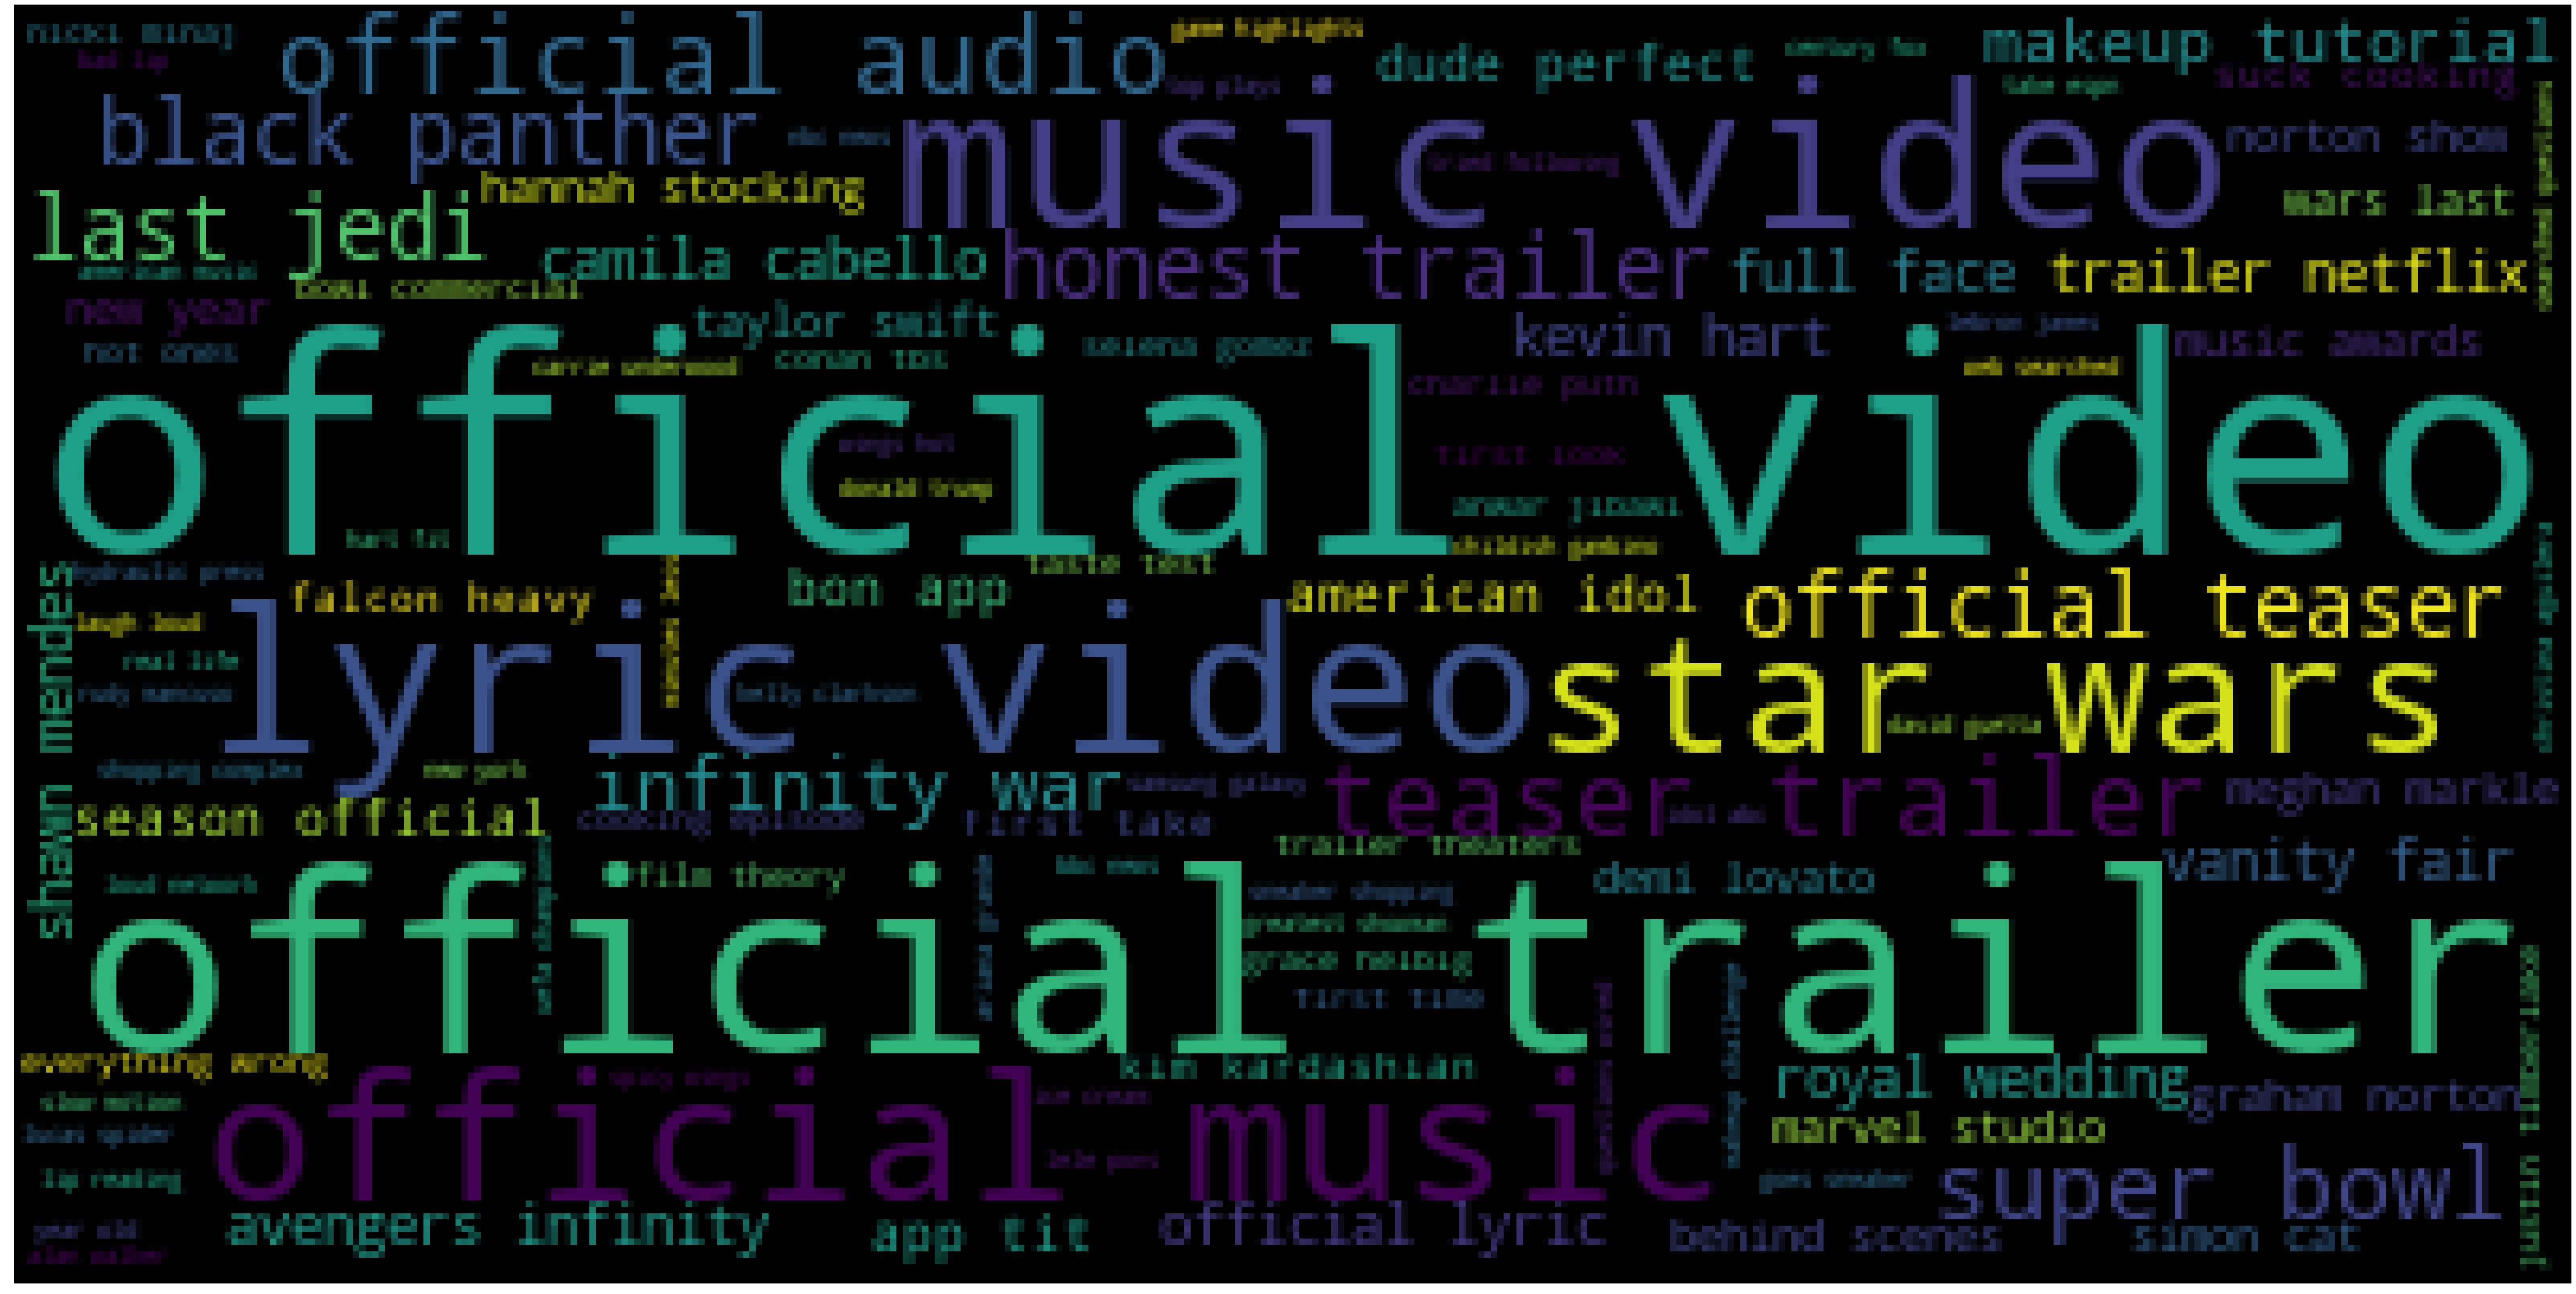

In [16]:
wc(cleaned_data_title,'black','Common Words' )

#### Frequently used words in tags column

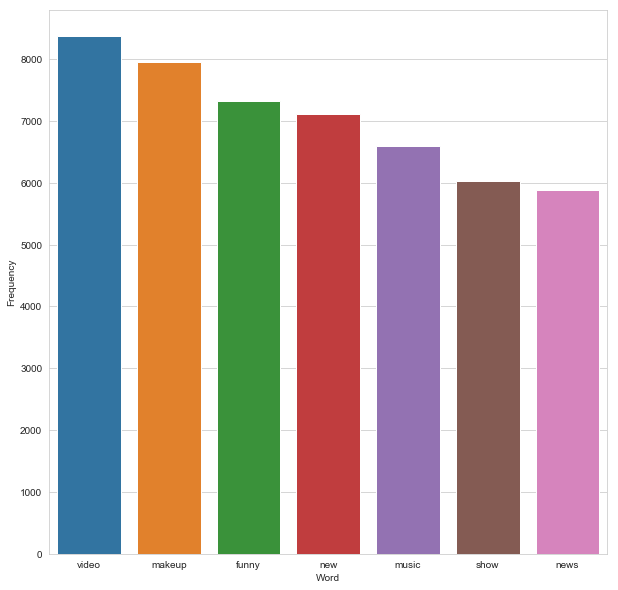

In [17]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

tags_lower = df_usa['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

Wordcloud for the frequently used words of tags column

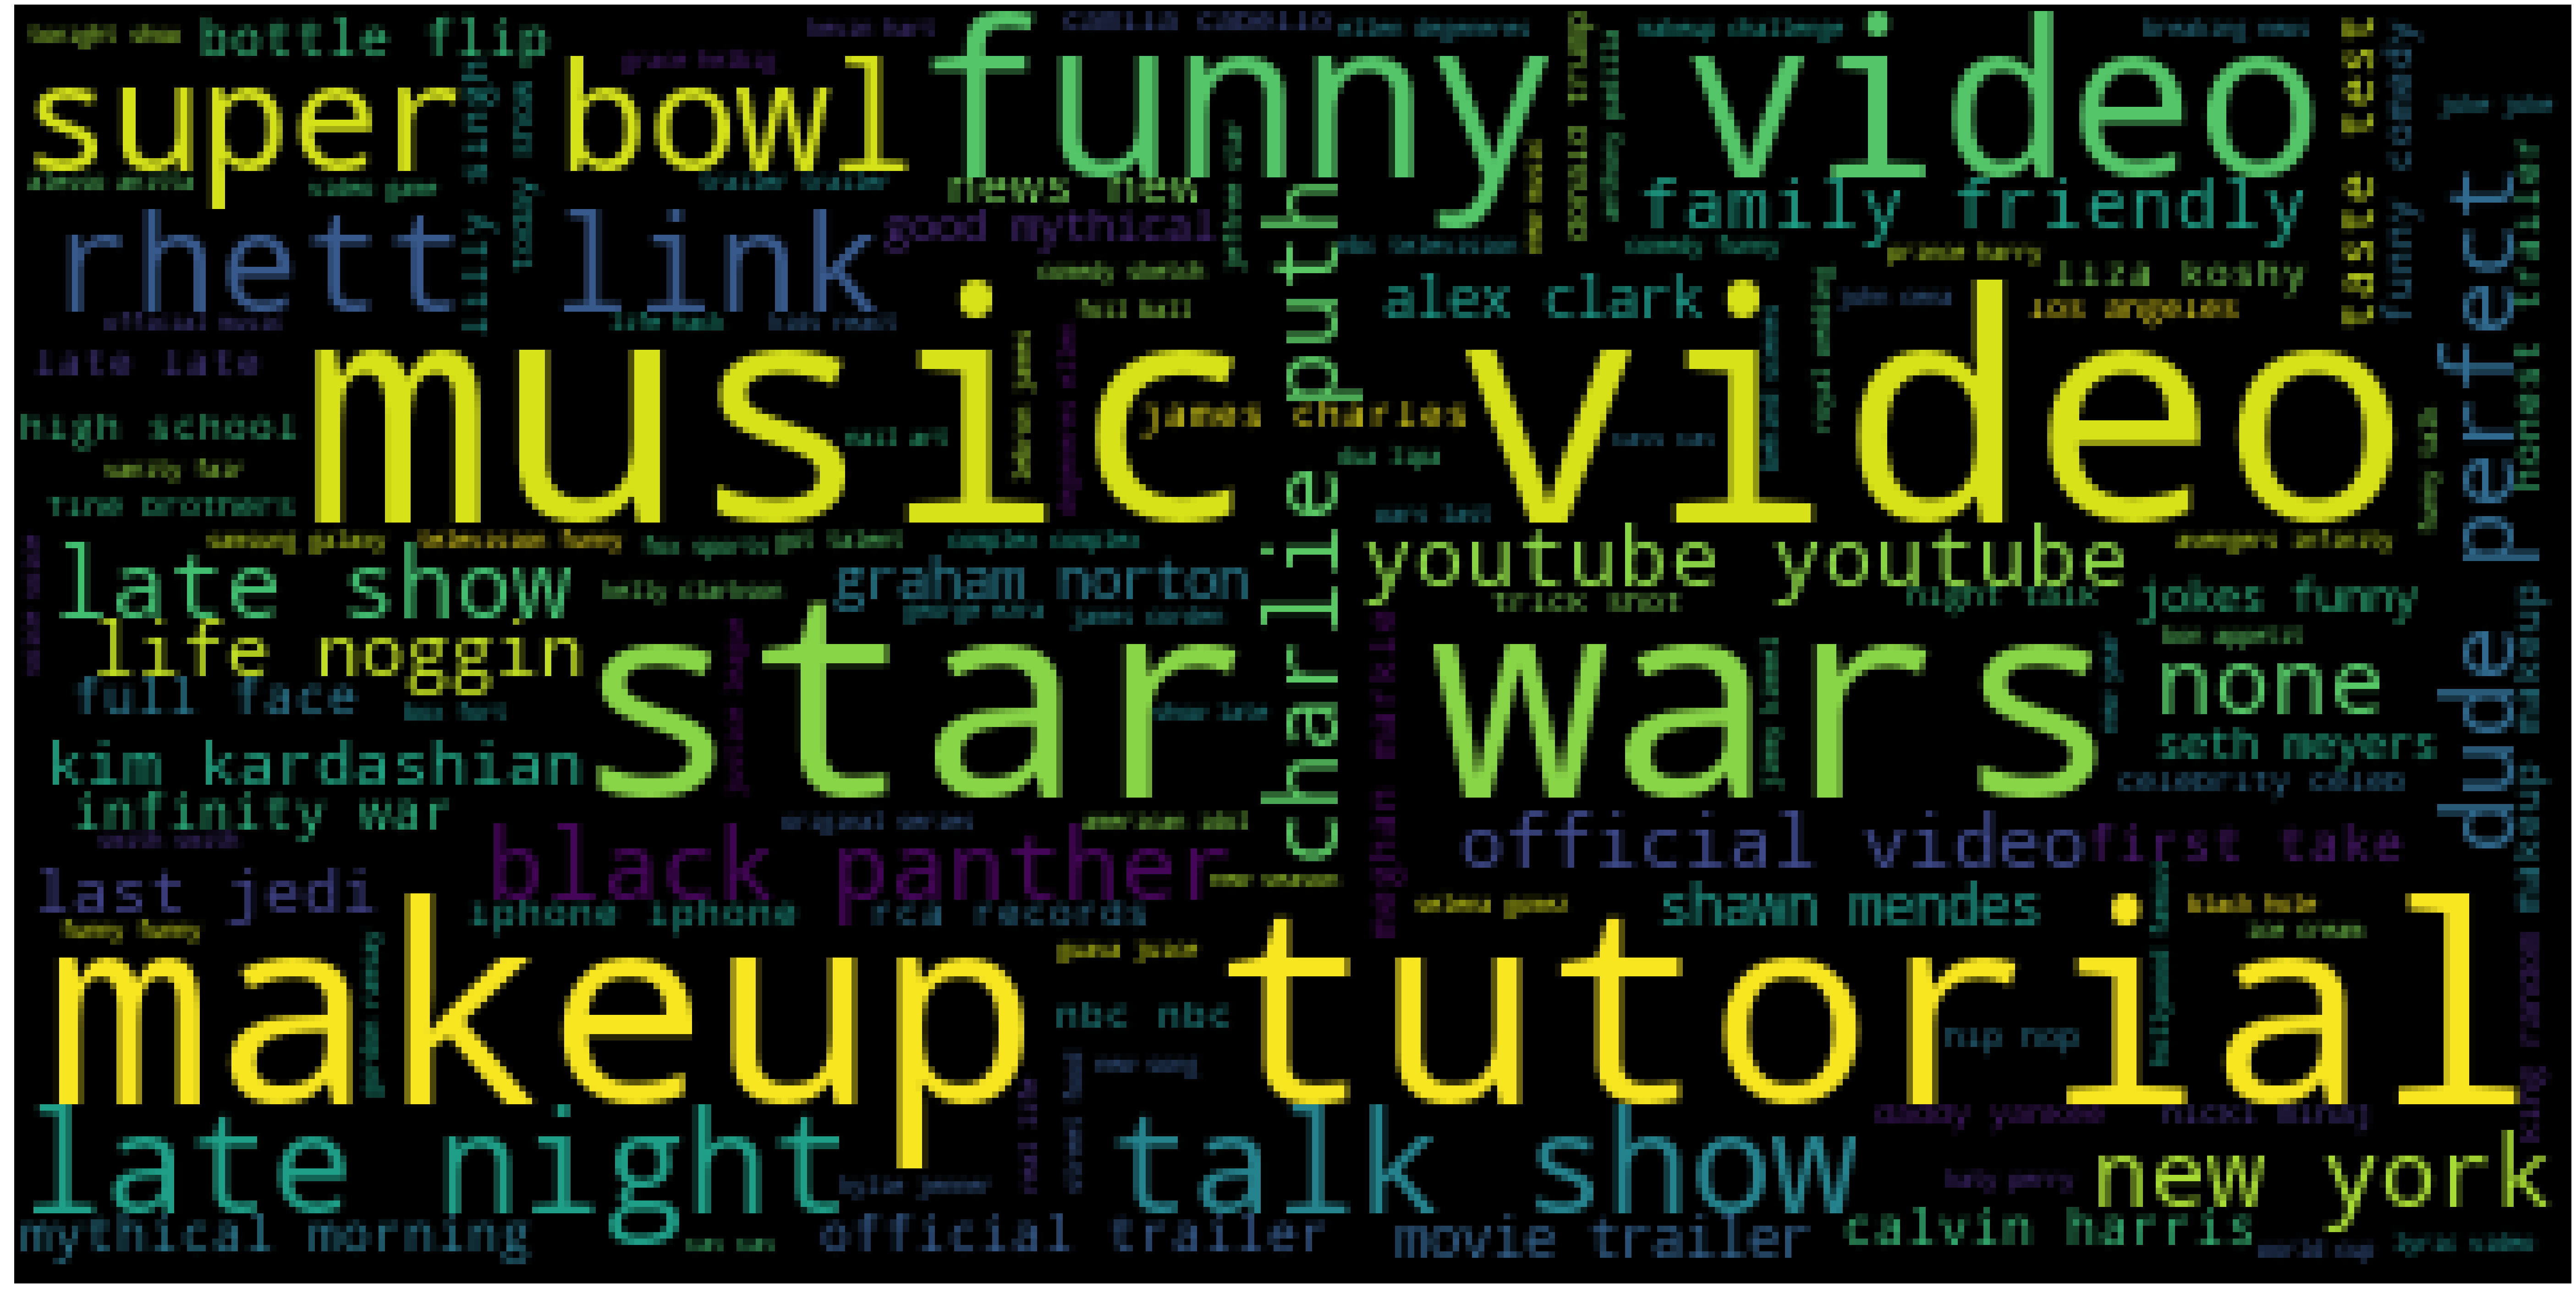

In [18]:
wc(cleaned_data_tags,'black','Common Words' )

#### Frequently used words in description column

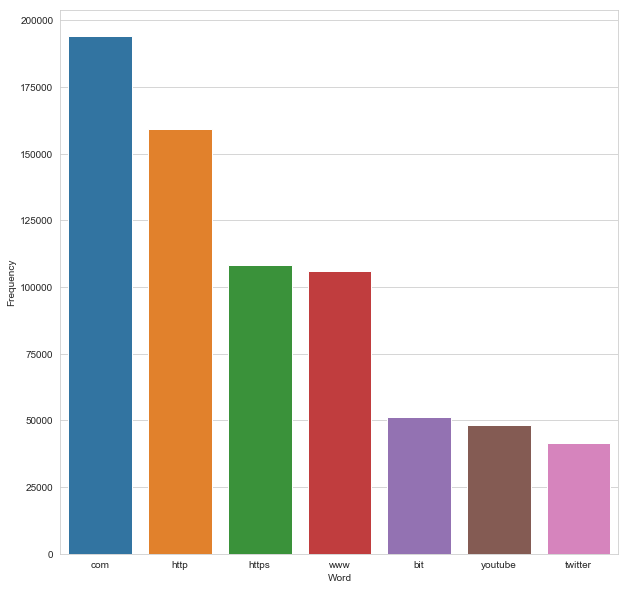

In [19]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df_usa['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

Wordcloud for the frequent words of Description column

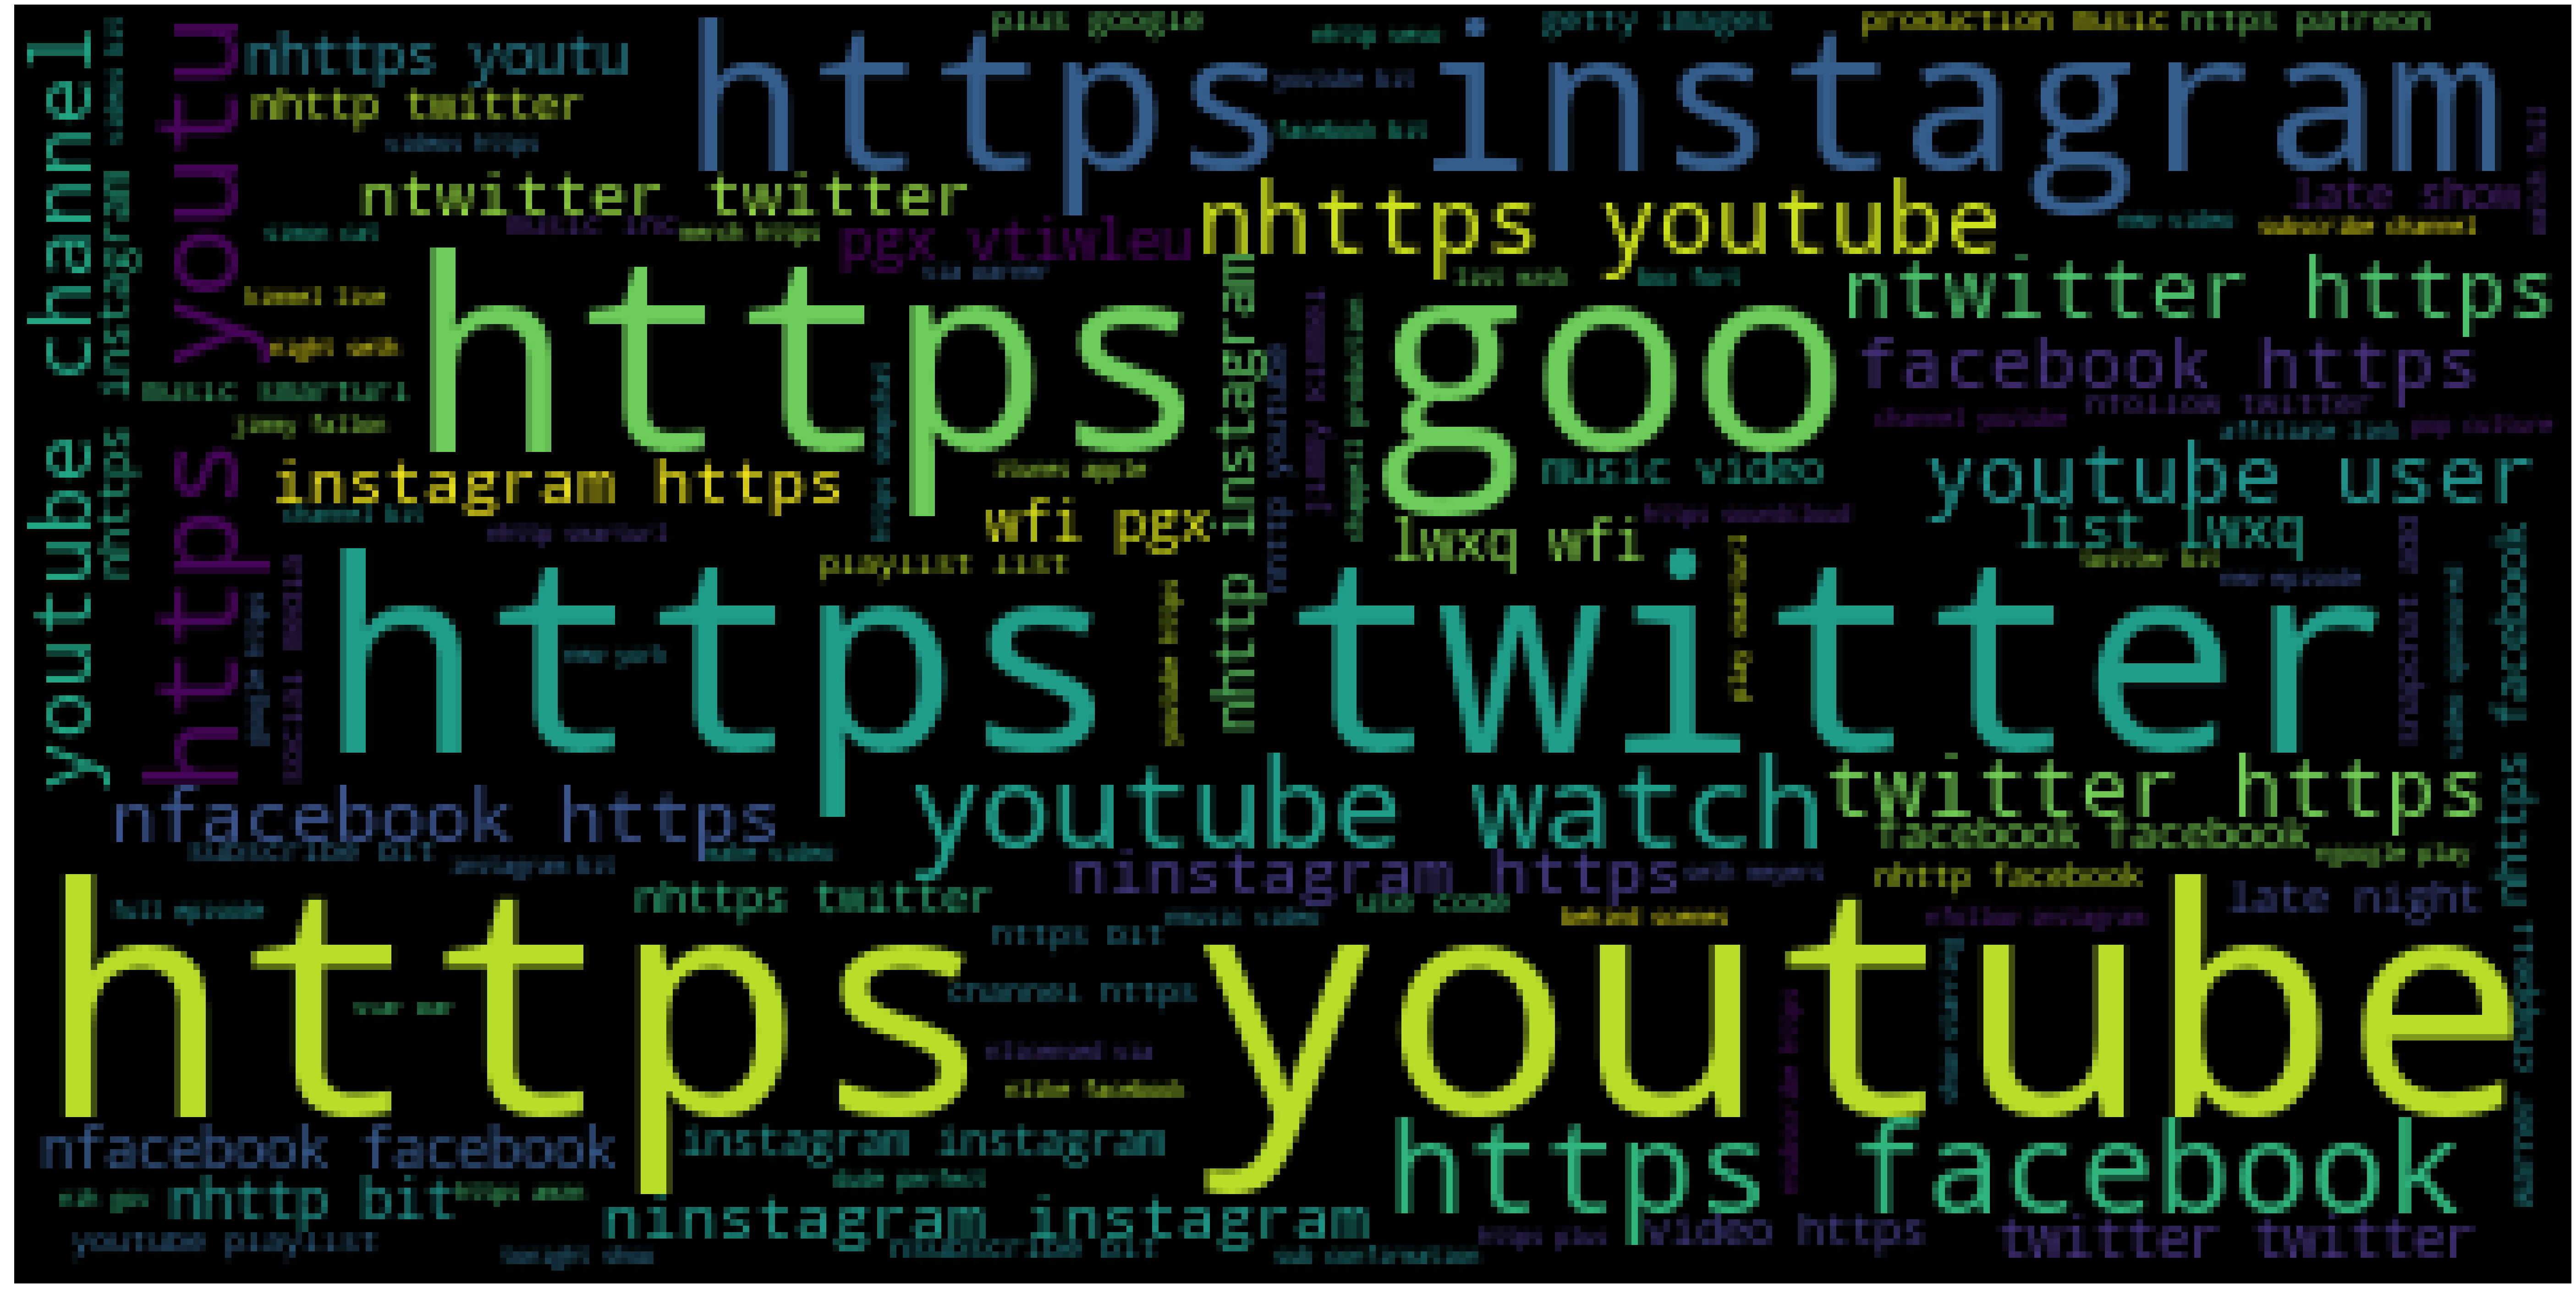

In [20]:
wc(cleaned_data_desc,'black','Frequent Words' )

#### Categorizing the Description column into Positive and Negative sentiments using TextBlob

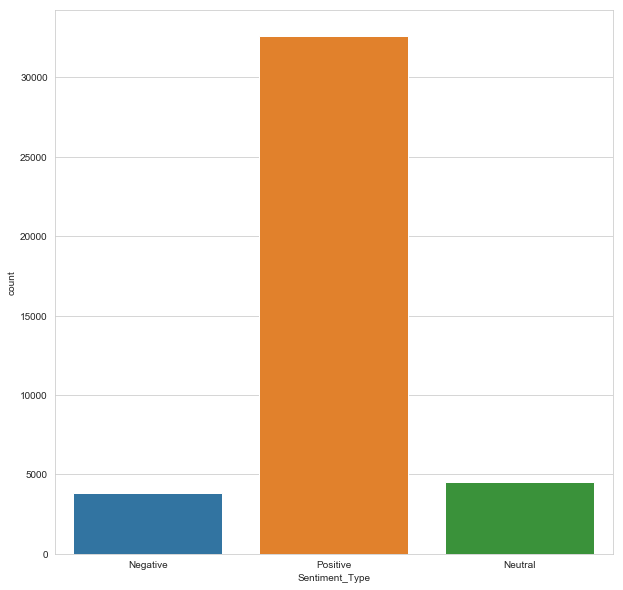

In [21]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df_usa['description'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

#### Categorizing the Tags column into Positive and Negative sentiments using TextBlob

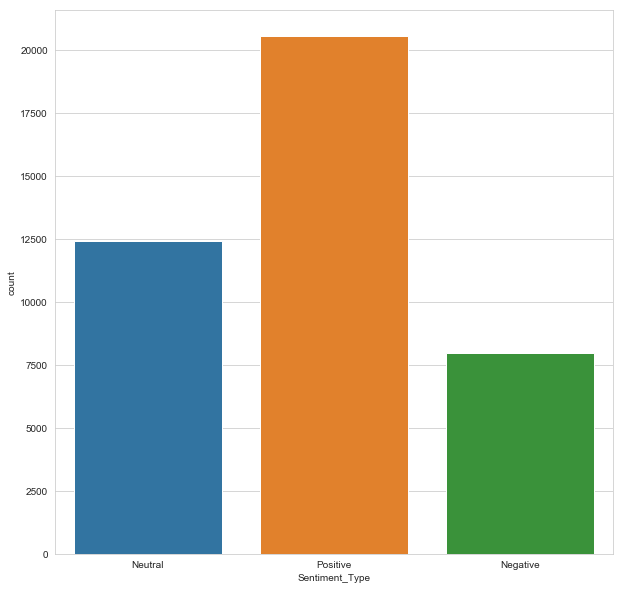

In [22]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df_usa['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

#### Categorizing the Title column into Positive and Negative sentiments using TextBlob

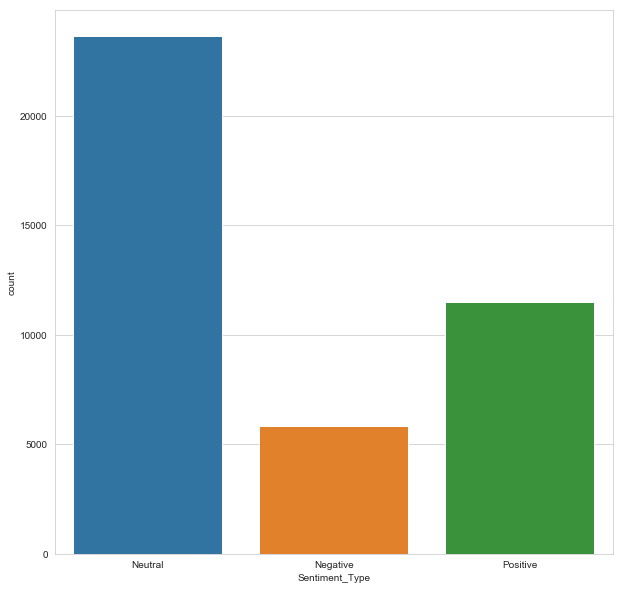

In [23]:
from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=df_usa['title']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)

#### Categorizing the Title column into Positive and Negative sentiments using SVM

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X = df_usa_polarity_title['sentence']
y = df_usa_polarity_title['Sentiment_Type']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear)
report = report.splitlines()
for i in report:
    print(i)

Training time: 137.075749s; Prediction time: 21.903728s
             precision    recall  f1-score   support

   Negative       0.99      0.97      0.98      1743
    Neutral       0.99      1.00      0.99      7111
   Positive       0.99      0.99      0.99      3431

avg / total       0.99      0.99      0.99     12285


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=30, dual=True)
model.fit(train_vectors, y_train)
preds = model.predict(test_vectors)
accuracy = (preds==y_test).mean()
accuracy

0.9943019943019943

#### Categorizing the Tags column into Positive and Negative sentiments using SVM

In [26]:
df_usa_polarity_tags.head()

,sentence,sentiment,polarity,Sentiment_Type
0,SHANtell martin,0.000000,0.000000,Neutral
1,"last week tonight trump presidency|""last week ...",0.000000,0.066667,Neutral
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.111111,0.344444,Positive
3,"rhett and link|""gmm""|""good mythical morning""|""...",0.266667,0.633333,Positive
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",-0.350000,0.766667,Negative


In [27]:
X1 = df_usa_polarity_tags['sentence']
y1 = df_usa_polarity_tags['Sentiment_Type']
X_train1, X_test1, y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3,random_state=42)
train_vectors1 = vectorizer.fit_transform(X_train1)
test_vectors1 = vectorizer.transform(X_test1)

In [28]:
classifier_linear1 = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear1.fit(train_vectors1, y_train1)
t1 = time.time()
prediction_linear1 = classifier_linear1.predict(test_vectors1)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report1 = classification_report(y_test1, prediction_linear1)
report1 = report1.splitlines()
for i in report1:
    print(i)

Training time: 312.502638s; Prediction time: 64.921044s
             precision    recall  f1-score   support

   Negative       0.98      0.97      0.98      2436
    Neutral       0.99      0.99      0.99      3714
   Positive       0.99      0.99      0.99      6135

avg / total       0.99      0.99      0.99     12285


In [30]:
model1 = LogisticRegression(C=30, dual=True)
model1.fit(train_vectors1, y_train1)
preds1 = model1.predict(test_vectors1)
accuracy1 = (preds1==y_test1).mean()

In [31]:
accuracy1

0.9939763939763939

#### Categorizing the Description column into Positive and Negative sentiments using SVM

In [32]:
X2 = df_usa_polarity_desc['sentence']
y2 = df_usa_polarity_desc['Sentiment_Type']
X_train2, X_test2, y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3,random_state=42)
train_vectors2 = vectorizer.fit_transform(X_train2)
test_vectors2 = vectorizer.transform(X_test2)

In [34]:
classifier_linear2 = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear2.fit(train_vectors2, y_train2)
t1 = time.time()
prediction_linear2 = classifier_linear2.predict(test_vectors2)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report2 = classification_report(y_test2, prediction_linear2)
# report2 = report.splitlines()


Training time: 792.132957s; Prediction time: 153.792075s
 
 
 
 
 
 
 
 
 
 
 
 
 
p
r
e
c
i
s
i
o
n
 
 
 
 
r
e
c
a
l
l
 
 
f
1
-
s
c
o
r
e
 
 
 
s
u
p
p
o
r
t




 
 
 
N
e
g
a
t
i
v
e
 
 
 
 
 
 
 
0
.
9
8
 
 
 
 
 
 
0
.
9
3
 
 
 
 
 
 
0
.
9
5
 
 
 
 
 
 
1
1
8
4


 
 
 
 
N
e
u
t
r
a
l
 
 
 
 
 
 
 
0
.
9
8
 
 
 
 
 
 
0
.
9
7
 
 
 
 
 
 
0
.
9
7
 
 
 
 
 
 
1
3
1
9


 
 
 
P
o
s
i
t
i
v
e
 
 
 
 
 
 
 
0
.
9
9
 
 
 
 
 
 
1
.
0
0
 
 
 
 
 
 
0
.
9
9
 
 
 
 
 
 
9
7
8
2




a
v
g
 
/
 
t
o
t
a
l
 
 
 
 
 
 
 
0
.
9
9
 
 
 
 
 
 
0
.
9
9
 
 
 
 
 
 
0
.
9
9
 
 
 
 
 
1
2
2
8
5




In [67]:
report2= report2.splitlines()
for i in report2:
    print(i)

             precision    recall  f1-score   support

   Negative       0.98      0.93      0.95      1184
    Neutral       0.98      0.97      0.97      1319
   Positive       0.99      1.00      0.99      9782

avg / total       0.99      0.99      0.99     12285


In [35]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(C=30, dual=True)
model2.fit(train_vectors2, y_train2)
preds2 = model2.predict(test_vectors2)
accuracy2 = (preds2==y_test2).mean()

In [36]:
accuracy2

0.9946275946275946

### Working on Canada dataset

In [37]:
df_ca['trending_date'] = pd.to_datetime(df_ca['trending_date'], format='%y.%d.%m')
df_ca['publish_time'] = pd.to_datetime(df_ca['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df_ca.insert(4, 'publish_date', df_ca['publish_time'].dt.date)
df_ca['publish_time'] = df_ca['publish_time'].dt.time
df_ca['publish_date']=pd.to_datetime(df_ca['publish_date'])

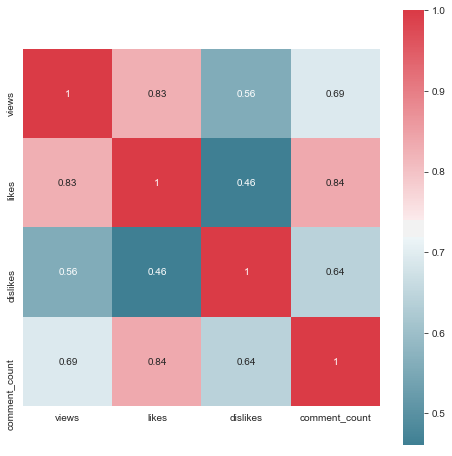

In [38]:
f1, ax1 = plt.subplots(figsize=(8, 8))
corr1 = df_ca[columns_show].corr()
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax1,annot=True)

In [39]:
ca_video_views=df_ca.groupby(['video_id'])['views'].agg('sum')
ca_video_likes=df_ca.groupby(['video_id'])['likes'].agg('sum')
ca_video_dislikes=df_ca.groupby(['video_id'])['dislikes'].agg('sum')
ca_video_comment_count=df_ca.groupby(['video_id'])['comment_count'].agg('sum')

In [40]:
df_ca_single_day_trend=df_ca.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_ca_multiple_day_trend= df_ca.drop_duplicates(subset='video_id',keep='first',inplace=False)

frames = [df_ca_single_day_trend, df_ca_multiple_day_trend]
df_ca_without_duplicates=pd.concat(frames)

df_ca_comment_disabled=df_ca_without_duplicates[df_ca_without_duplicates['comments_disabled']==True].describe()
df_ca_rating_disabled=df_ca_without_duplicates[df_ca_without_duplicates['ratings_disabled']==True].describe()
df_ca_video_error=df_ca_without_duplicates[df_ca_without_duplicates['video_error_or_removed']==True].describe()

In [41]:
df_ca_single_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,2017-11-13,25,07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
12,FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,2017-11-12,1,16:00:01,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",158815,218,30,186,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...
13,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,2017-11-11,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
16,gifPYwArCVQ,2017-11-14,Fake Pet Smart Employee Prank!,NELK,2017-11-13,23,01:30:01,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",557883,44558,621,9619,https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,False,False,False,3 Days left to cop NELK merch: https://nelk.ca...
17,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...


In [42]:
df_ca_multiple_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


Which video trended on maximum days and what is the title, likes, dislikes, comments, and views.

Text(0.5,1,'Top 5 Videos that trended maximum days in CANADA')

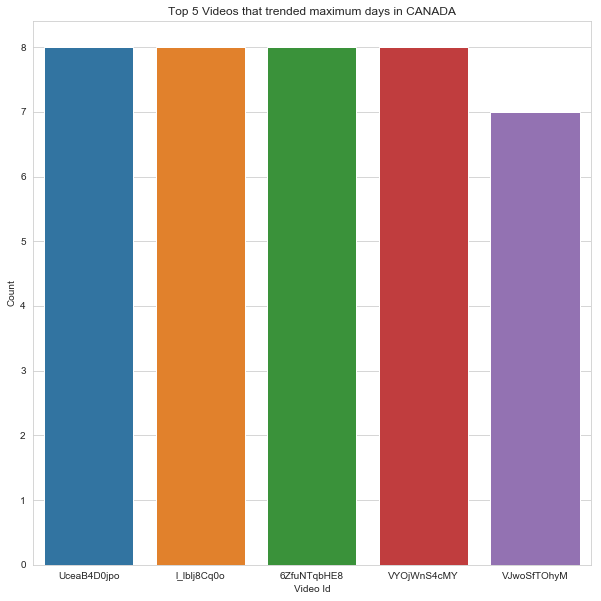

In [43]:
df_ca_which_video_trended_maximum_days=df_ca.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_ca_which_video_trended_maximum_days['video_id'],y=df_ca_which_video_trended_maximum_days['trending_date'], data=df_ca_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in CANADA")

Video which were trended for maximum days

The maximum no. of days a video trended is 8 i.e. for 'UceaB4D0jpo' video id. Now, the below script gives its likes,dislikes, views, and comments.

In [44]:
df_ca_maximum_views=ca_video_views['UceaB4D0jpo']
df_ca_maximum_likes=ca_video_likes['UceaB4D0jpo']
df_ca_maximum_dislikes=ca_video_dislikes['UceaB4D0jpo']
df_ca_maximum_comment=ca_video_comment_count['UceaB4D0jpo']

Videos that took maximum number of days to become trending videos

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Maximum no of days taken by 5 videos to be popular in ca')

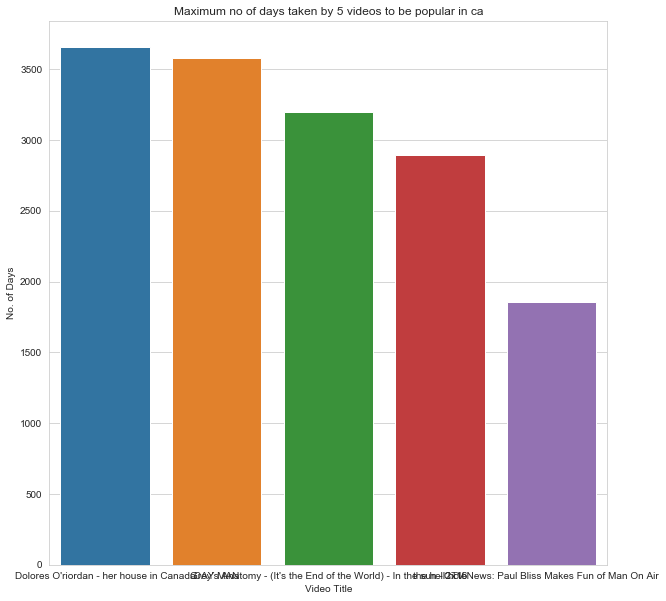

In [45]:
df_ca_multiple_day_trend['Days_taken_to_be_trending_video'] =df_ca_multiple_day_trend['trending_date'] - df_ca_multiple_day_trend['publish_date']
df_ca_multiple_day_trend['Days_taken_to_be_trending_video']= df_ca_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')
ca_no_of_days_take_trend=df_ca_multiple_day_trend.sort_values(by='Days_taken_to_be_trending_video',ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=ca_no_of_days_take_trend['title'],y=ca_no_of_days_take_trend['Days_taken_to_be_trending_video'], data=ca_no_of_days_take_trend)
plt.xlabel("Video Title")
plt.ylabel("No. of Days")
plt.title("Maximum no of days taken by 5 videos to be popular in ca")

Similar to the, there are videos that took almost 10 years to come into the trending list. The number of days the first video took to become trending was around 3600

Text(0.5,1,'Top 5 Trending Channel in Canada')

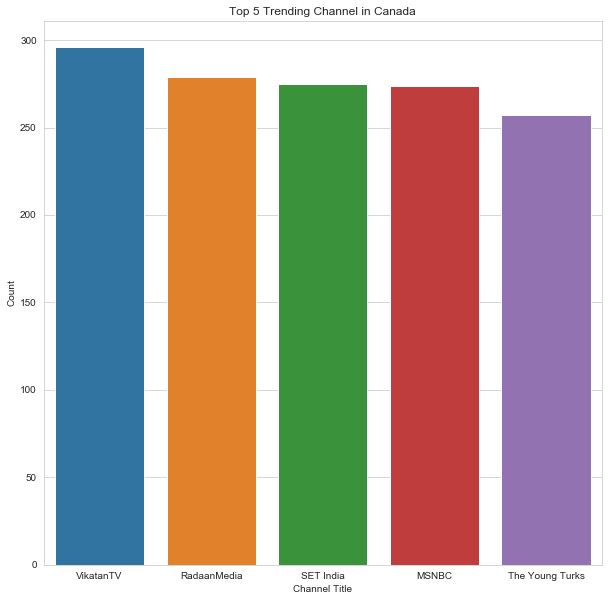

In [46]:
ca_trending_channel=df_ca_without_duplicates.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=ca_trending_channel['channel_title'],y=ca_trending_channel['video_id'], data=ca_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in Canada")

C:\Users\chait\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Top 5 Category IDs for Canada')

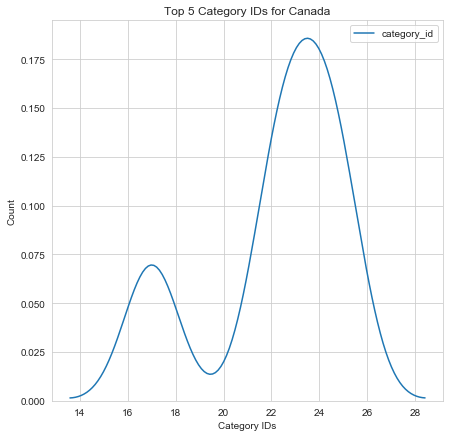

In [47]:
ca_category_id=df_ca_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(ca_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for Canada")

Frequent Words in Title

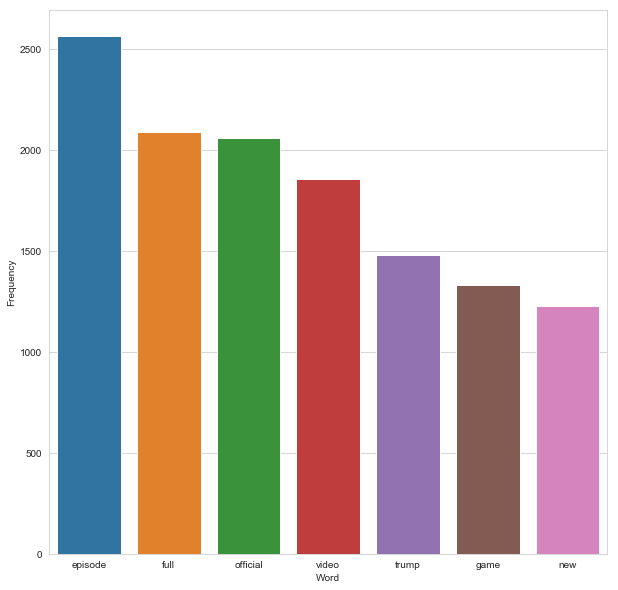

In [48]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_ca['title'] for r in v)

a = df_ca['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

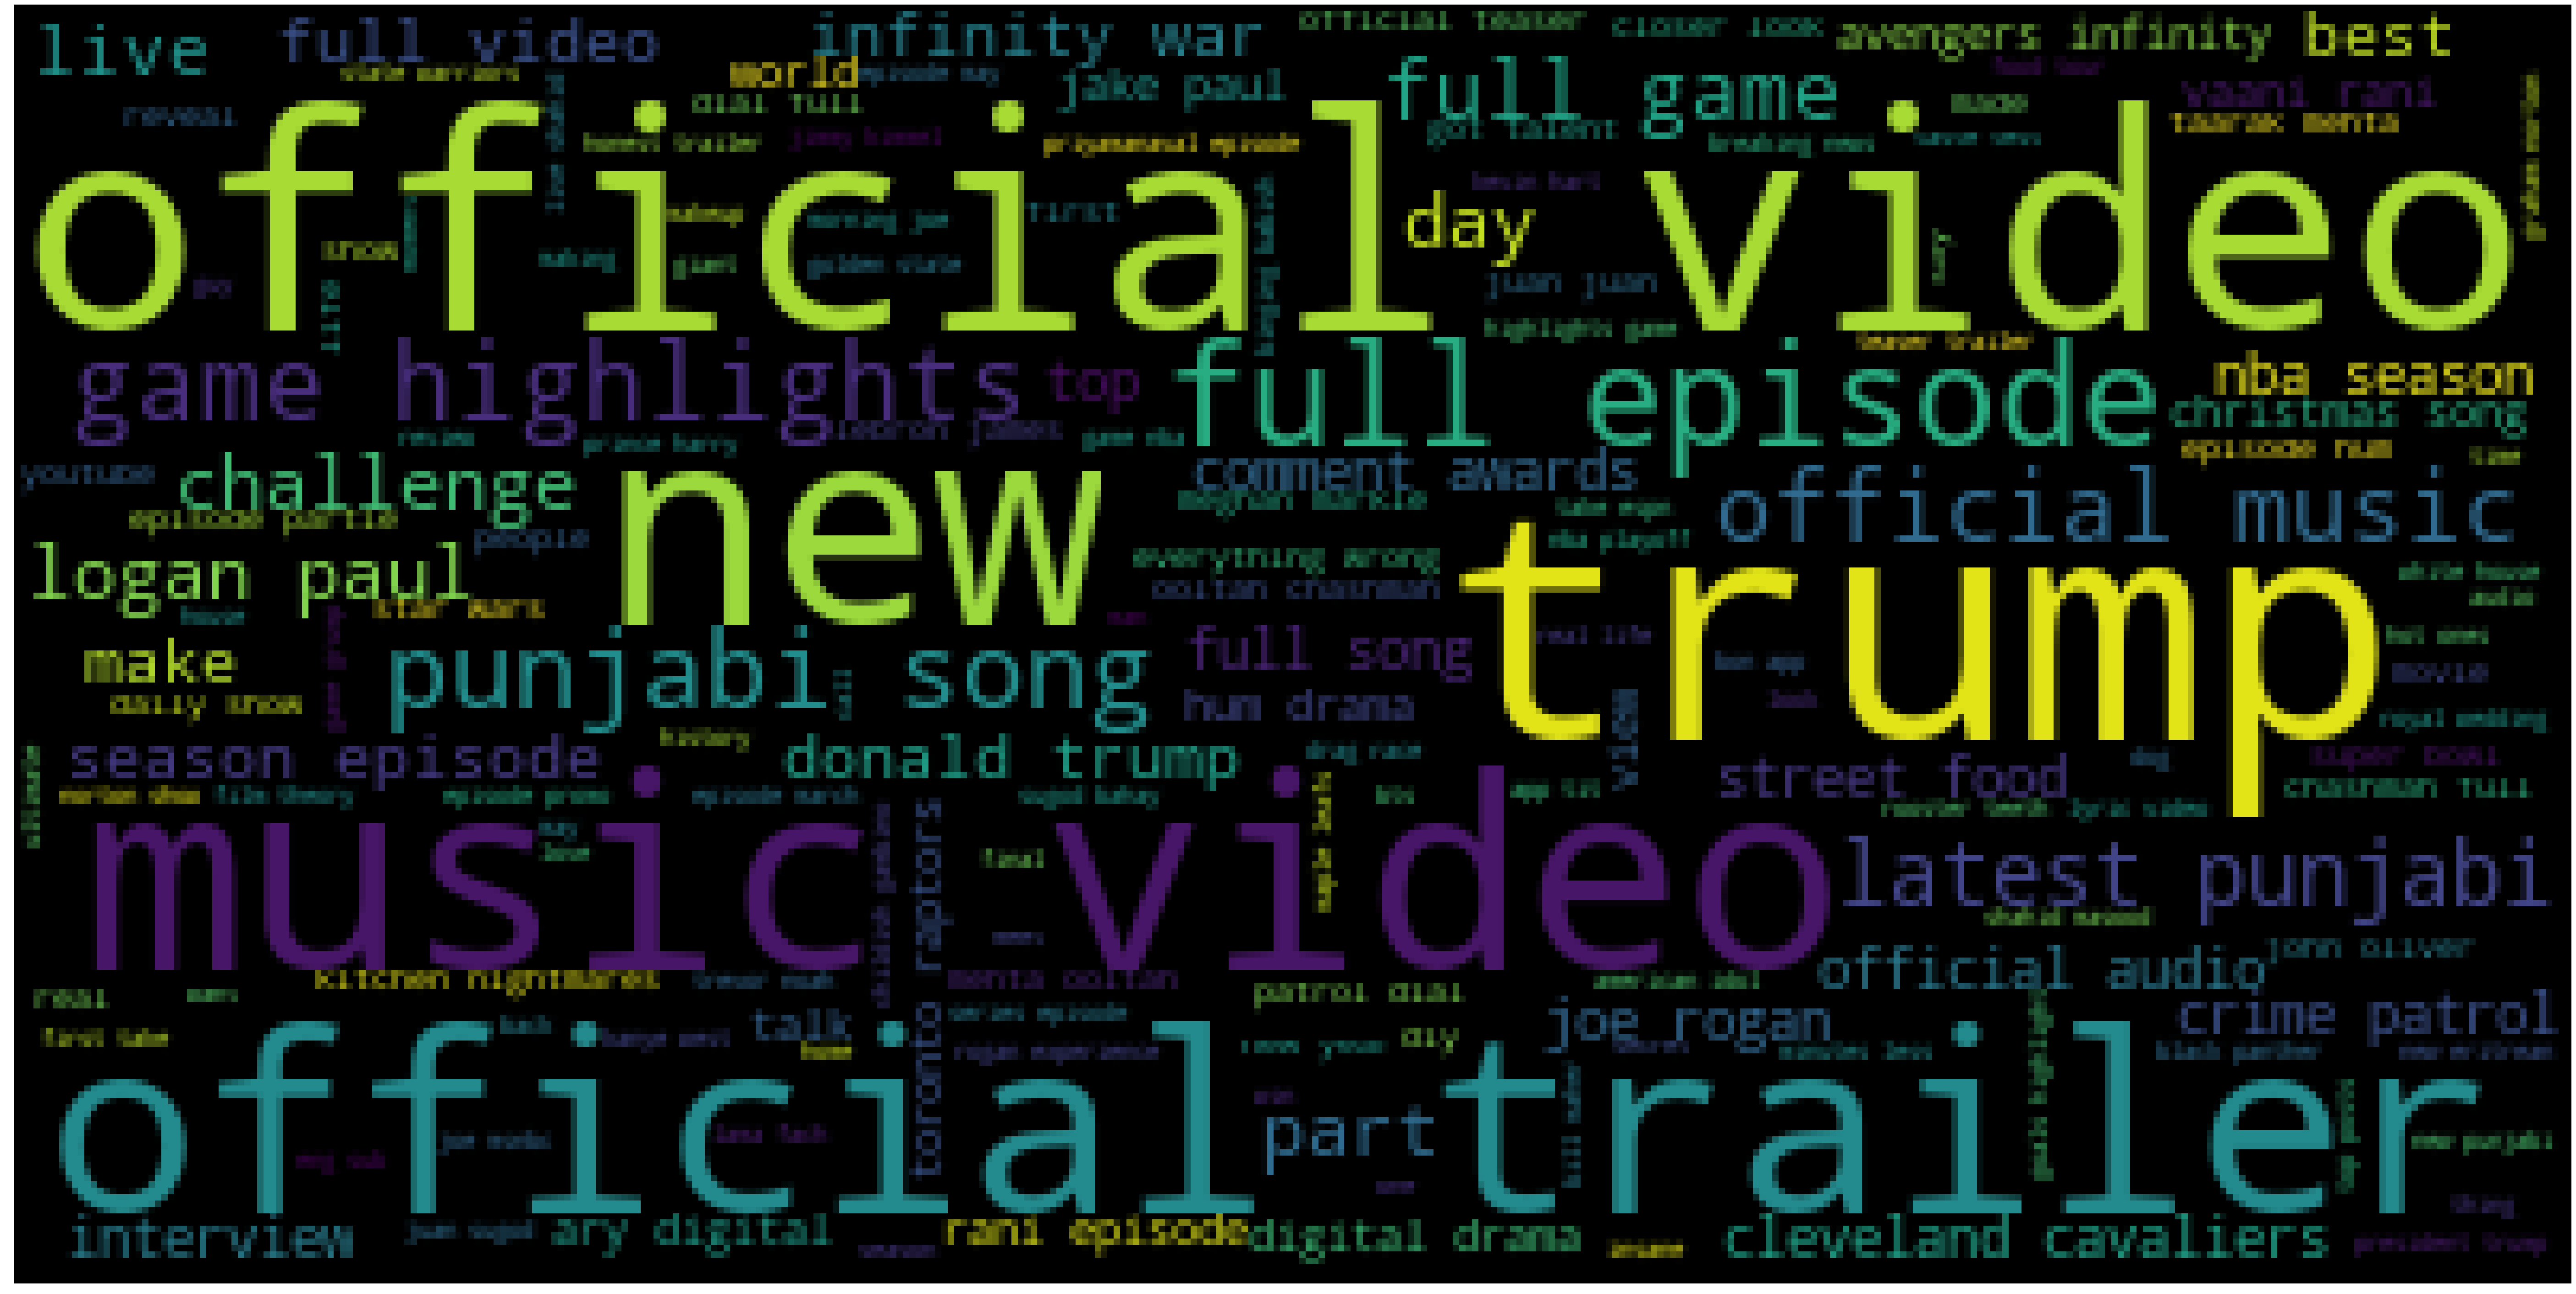

In [49]:
wc(cleaned_data_title,'black','Common Words' )

Frequent Words in Tags

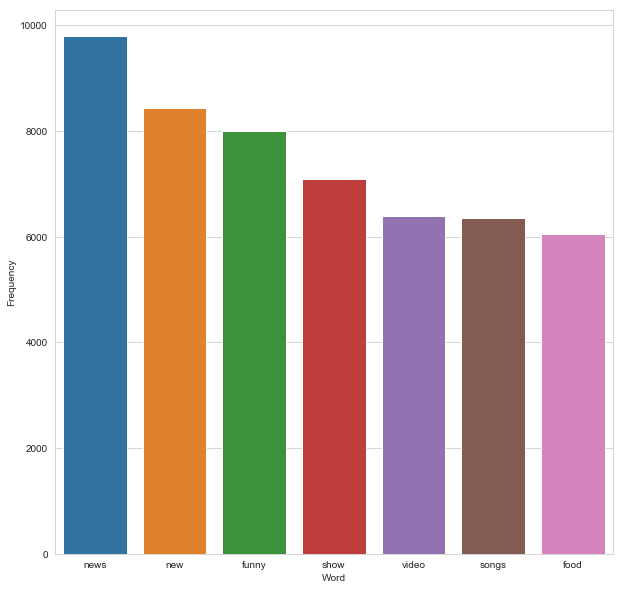

In [50]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_ca['title'] for r in v)

tags_lower = df_ca['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

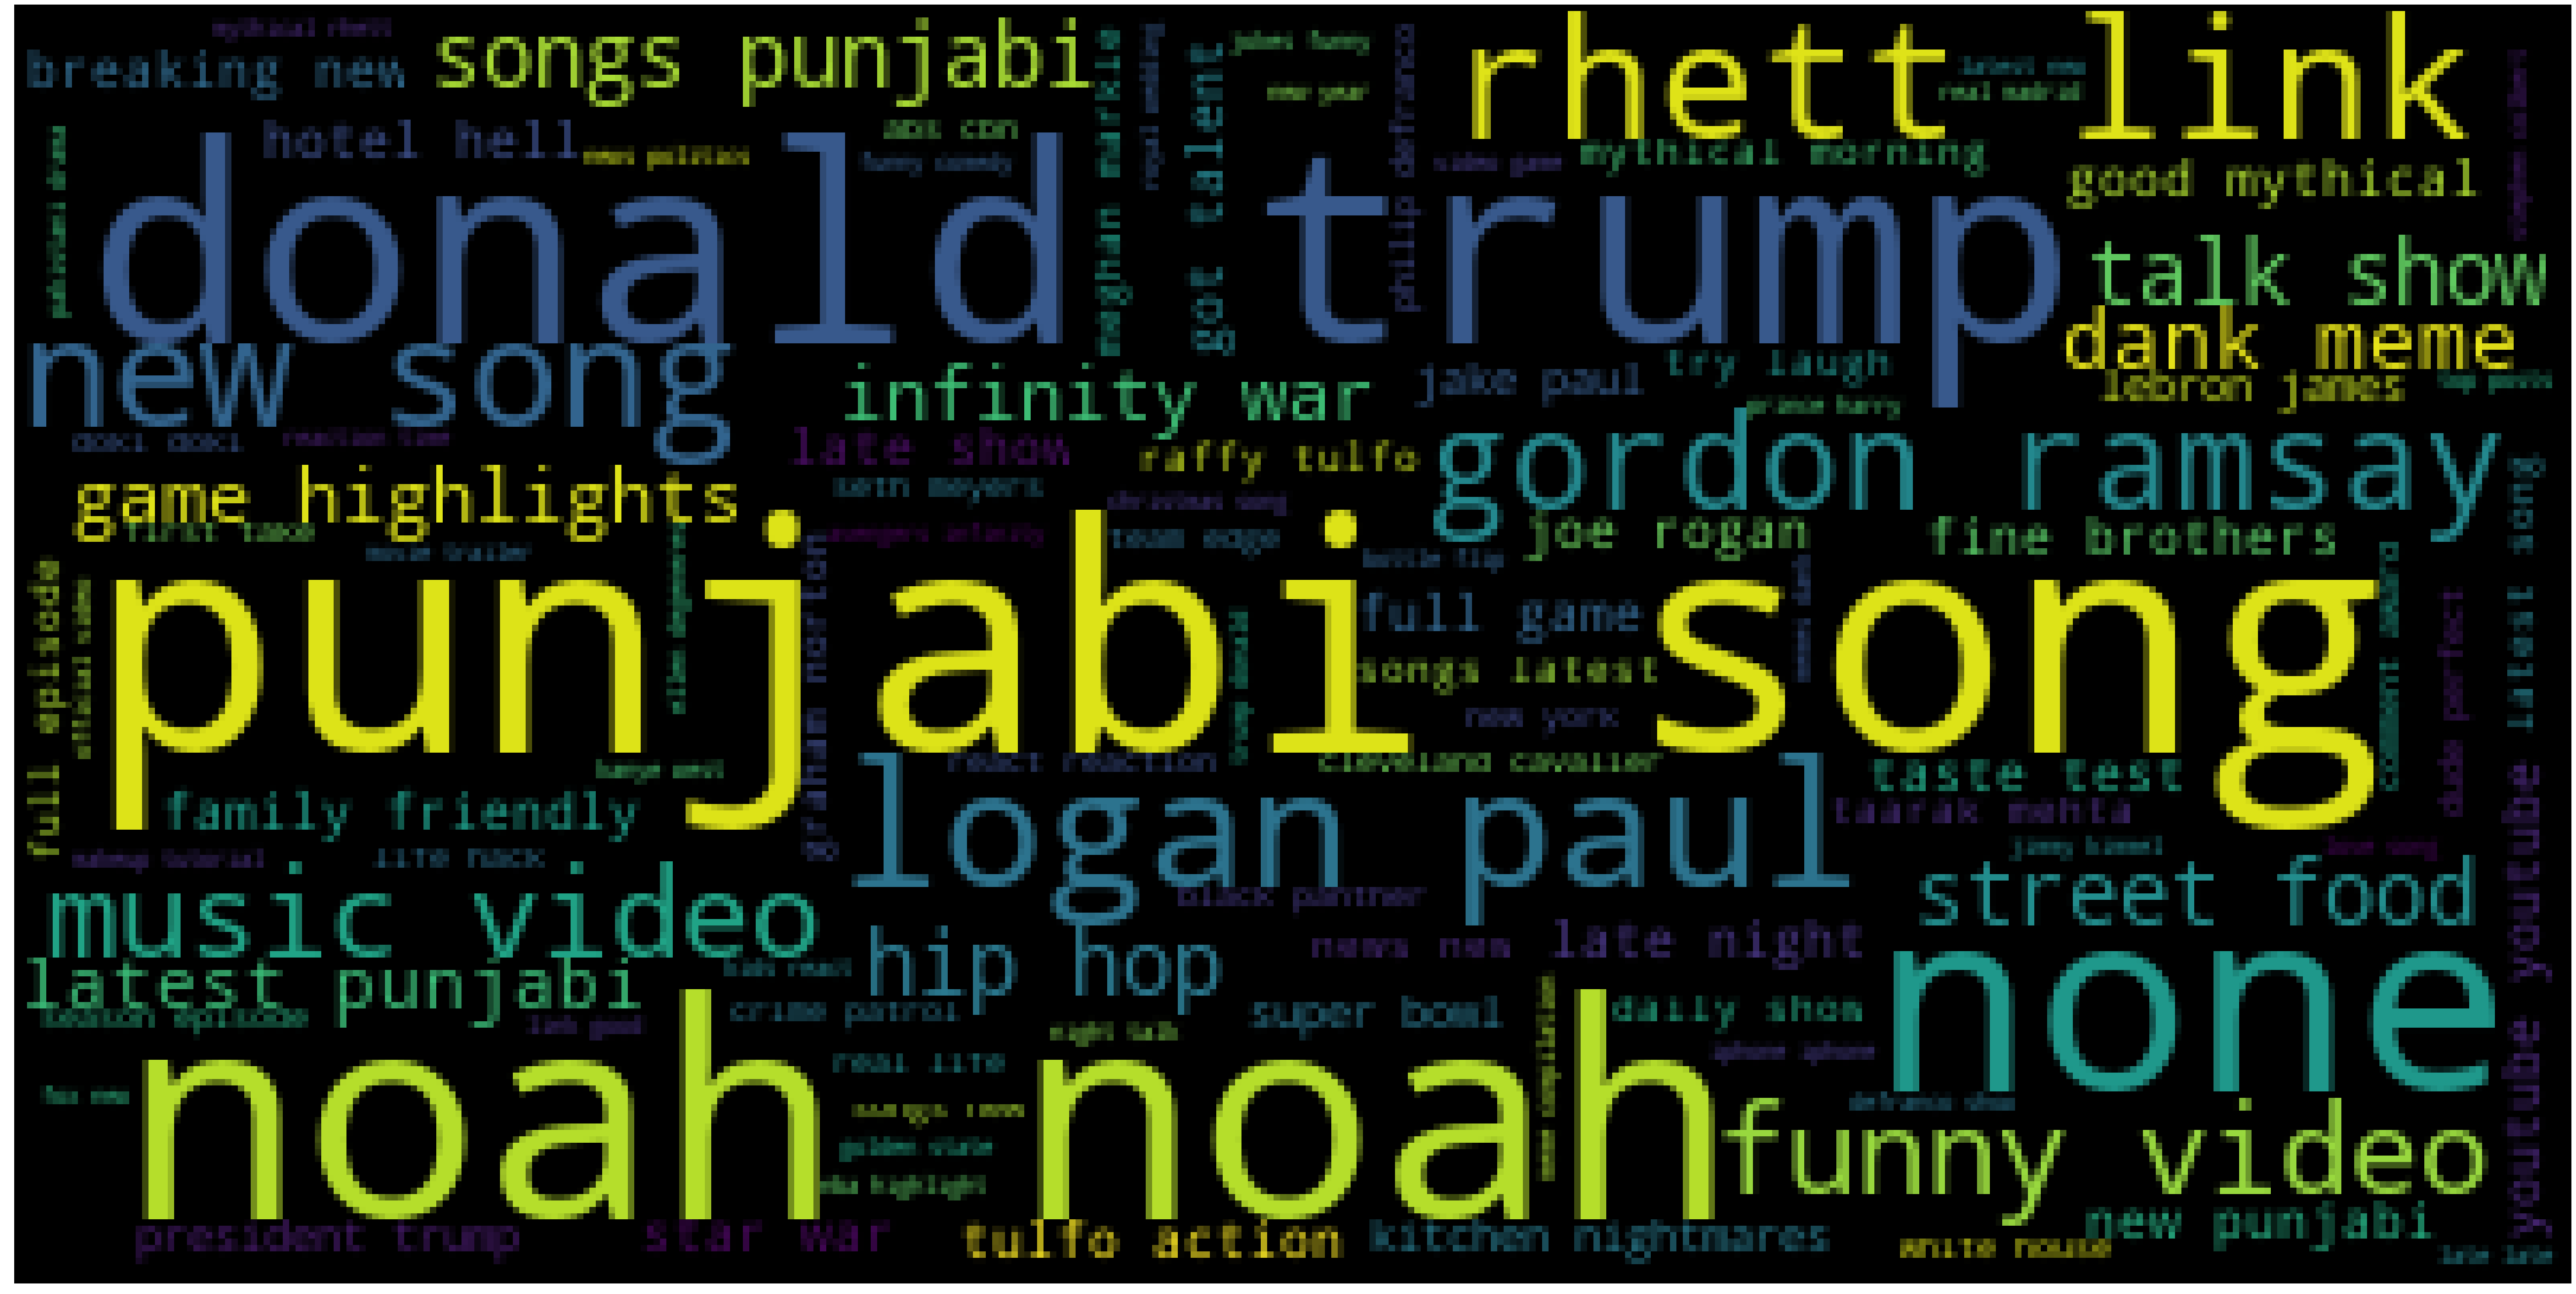

In [51]:
wc(cleaned_data_tags,'black','Common Words' )

Frequent Words in Description

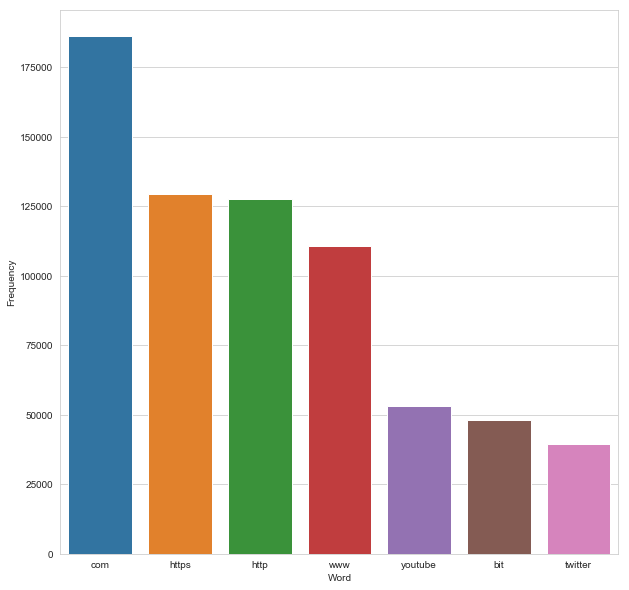

In [52]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_ca['title'] for r in v)

desc_lower = df_ca['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

Word cloud for Frequent Words in Description

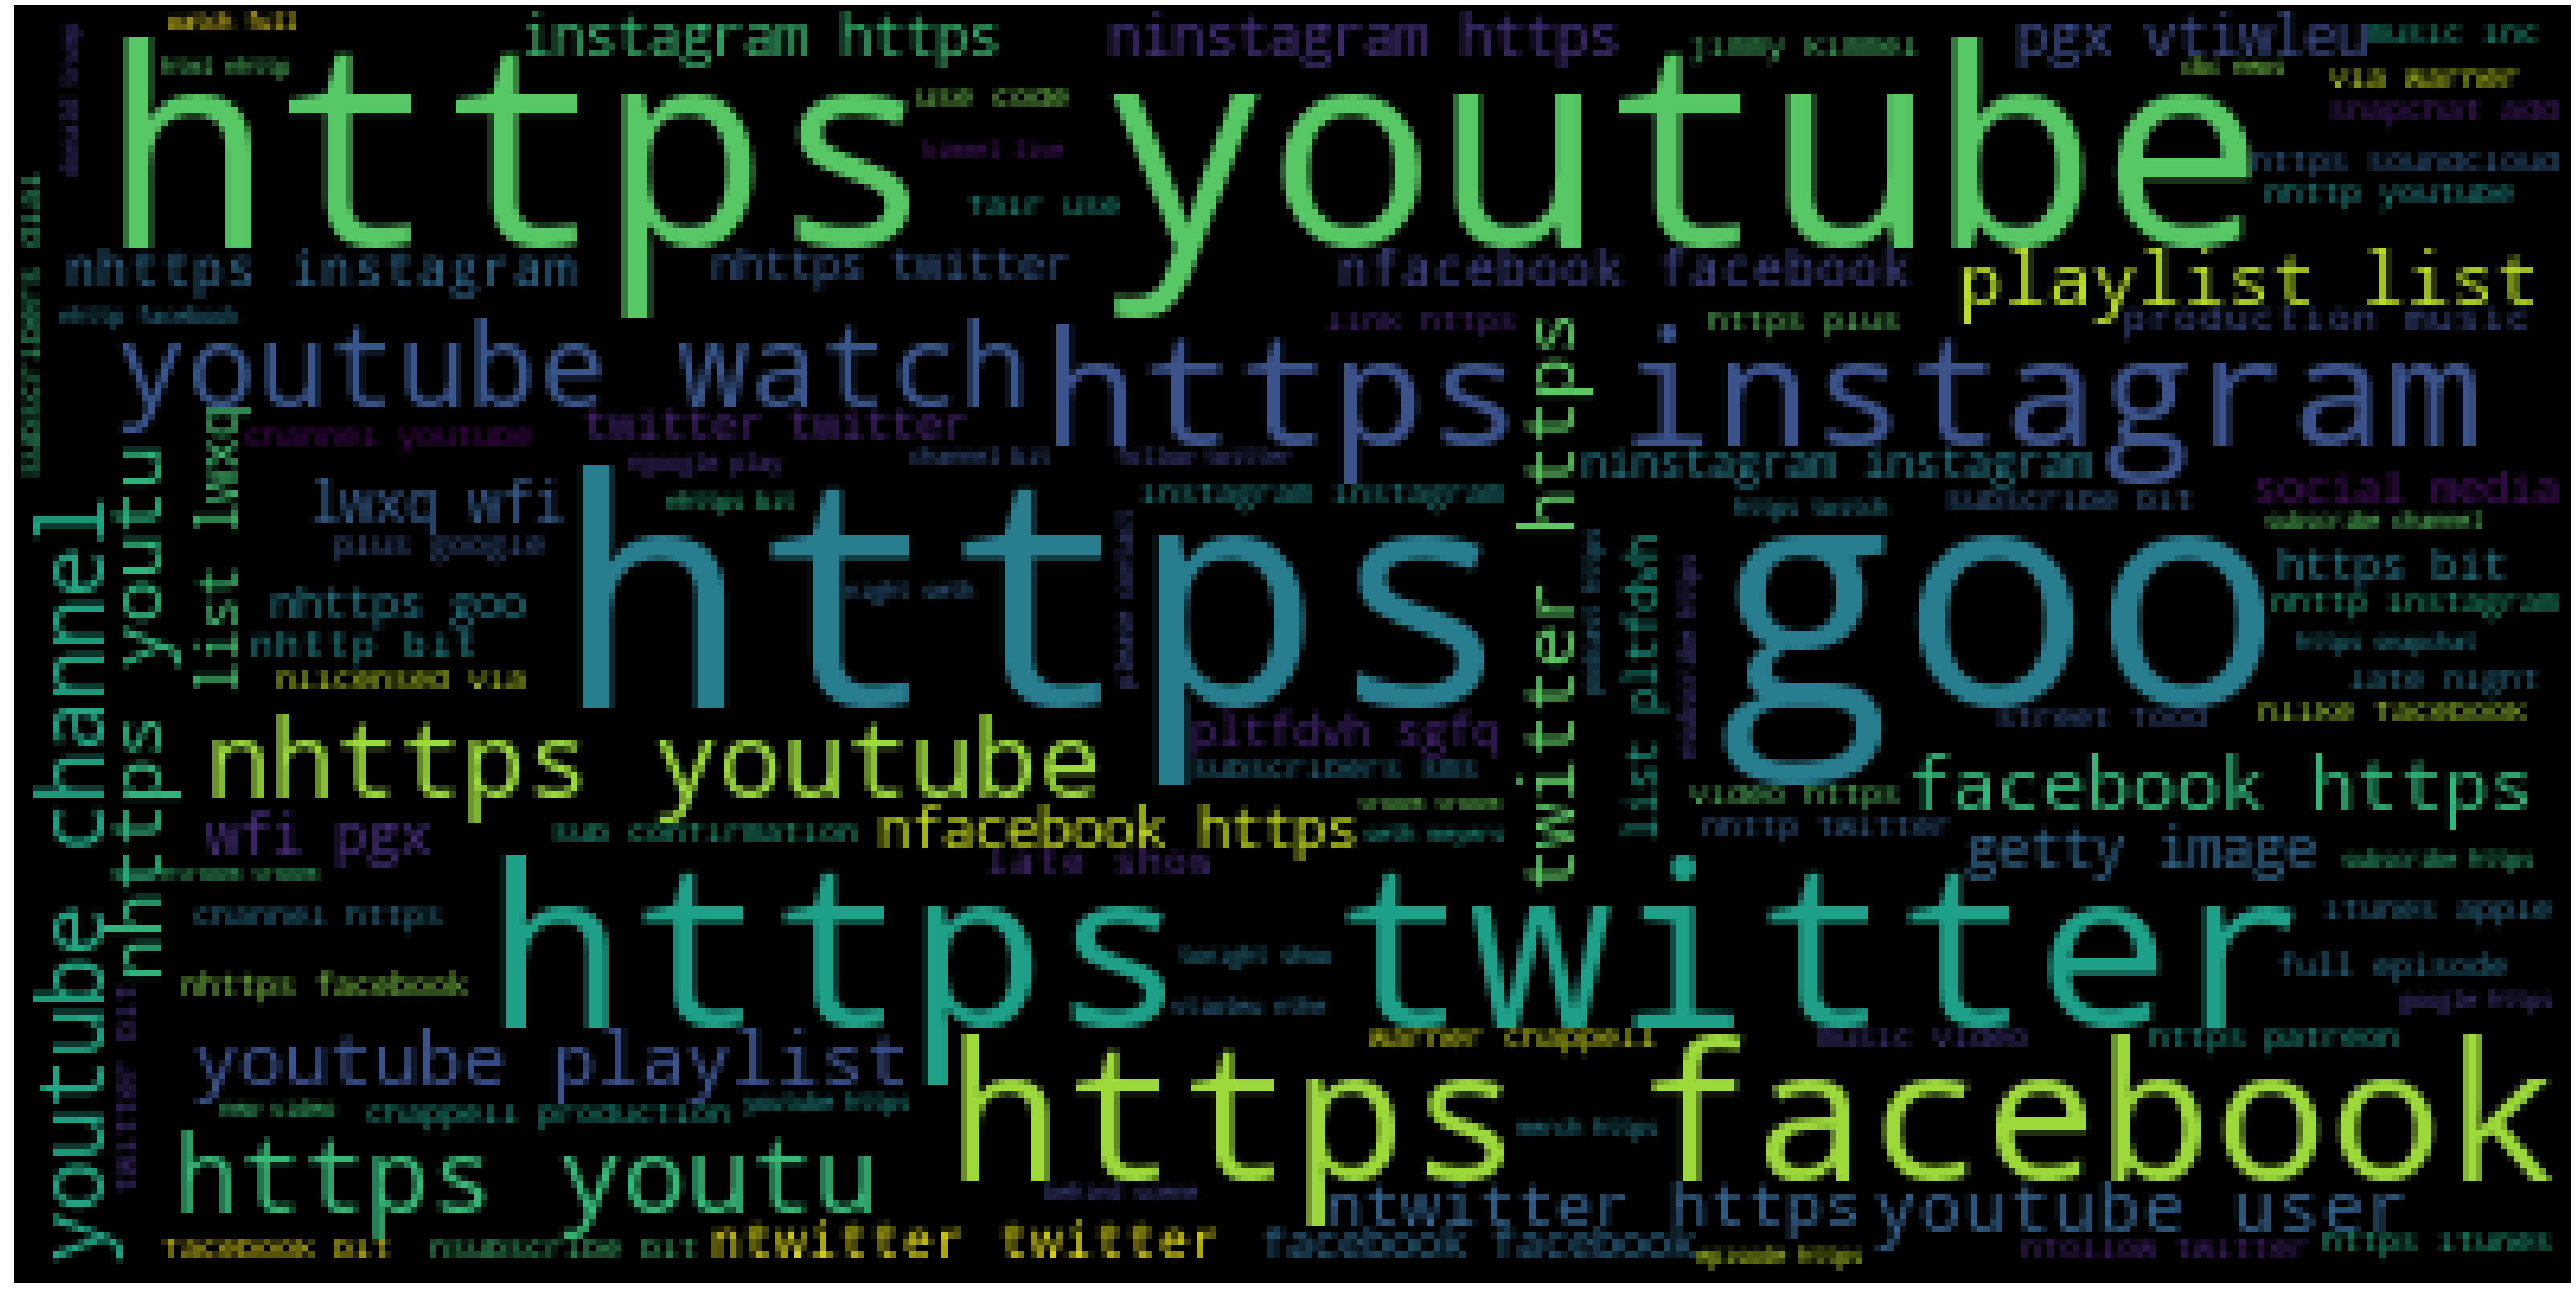

In [53]:
wc(cleaned_data_desc,'black','Frequent Words')

Sentiment analysis using Textblob on description column

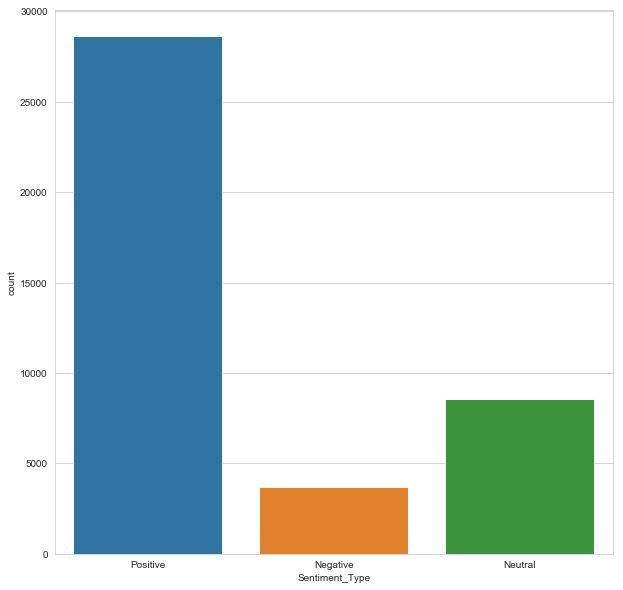

In [54]:
from textblob import TextBlob

bloblist_desc = list()

df_ca_descr_str=df_ca['description'].astype(str)
for row in df_ca_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_ca_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_ca_polarity_desc):
    if df_ca_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_ca_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_ca_polarity_desc['Sentiment_Type'] = df_ca_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_ca_polarity_desc)

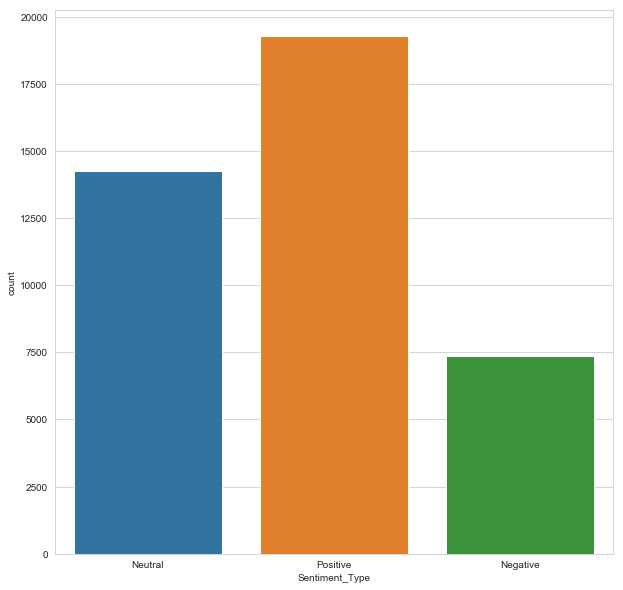

In [55]:
from textblob import TextBlob

bloblist_tags = list()

df_ca_tags_str=df_ca['tags']
for row in df_ca_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_ca_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_ca_polarity_tags):
    if df_ca_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_ca_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_ca_polarity_tags['Sentiment_Type'] = df_ca_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_ca_polarity_tags)

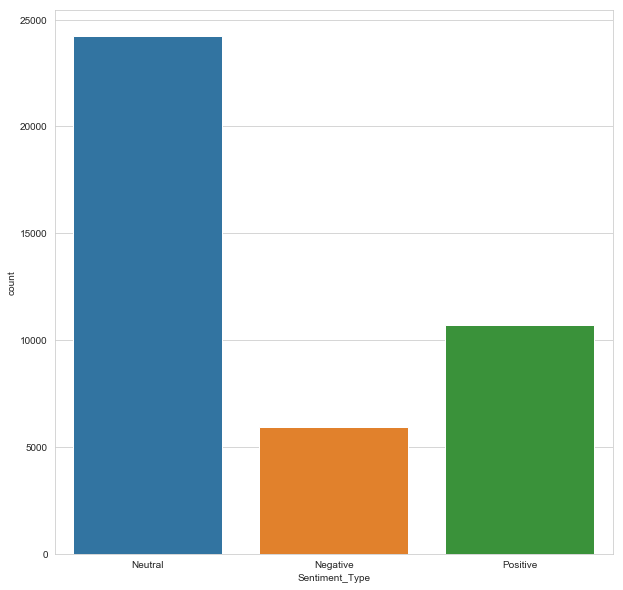

In [56]:
from textblob import TextBlob

bloblist_title = list()

df_ca_title_str=df_ca['title']
for row in df_ca_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_ca_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_ca_polarity_title):
    if df_ca_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_ca_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_ca_polarity_title['Sentiment_Type'] = df_ca_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_ca_polarity_title)

In [66]:
X4 = df_ca_polarity_title['sentence']
y4 = df_ca_polarity_title['Sentiment_Type']
X_train4, X_test4, y_train4,y_test4= train_test_split(X4,y4,test_size = 0.3,random_state=42)

train_vectors4 = vectorizer.fit_transform(X_train4)
test_vectors4 = vectorizer.transform(X_test4)
classifier_linear4 = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear4.fit(train_vectors4, y_train4)
t1 = time.time()
prediction_linear4 = classifier_linear4.predict(test_vectors4)
t4 = time.time()
time_linear_train = t1-t0
time_linear_predict = t4-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report4 = classification_report(y_test4, prediction_linear4)
report4 = report4.splitlines()
for i in report4:
    print(i)

Training time: 227.340886s; Prediction time: 28.415676s
             precision    recall  f1-score   support

   Negative       0.96      0.89      0.92      1803
    Neutral       0.96      0.99      0.98      7288
   Positive       0.96      0.94      0.95      3174

avg / total       0.96      0.96      0.96     12265


### Working on Great Britain Dataset

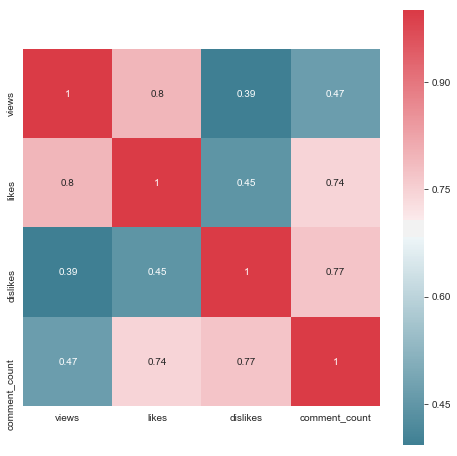

In [57]:
f2, ax2 = plt.subplots(figsize=(8, 8))
corr2 = df_gb[columns_show].corr()
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax2,annot=True)

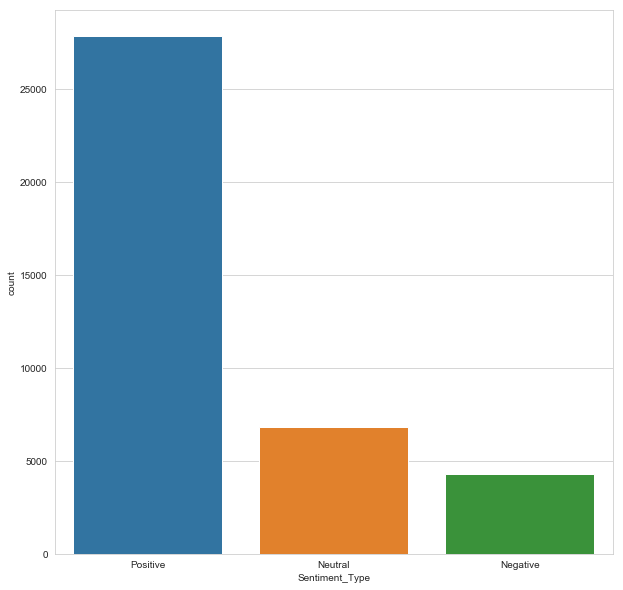

In [58]:
bloblist_desc = list()

df_gb_descr_str=df_gb['description'].astype(str)
for row in df_gb_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_gb_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_gb_polarity_desc):
    if df_gb_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_gb_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_gb_polarity_desc['Sentiment_Type'] = df_gb_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_gb_polarity_desc)

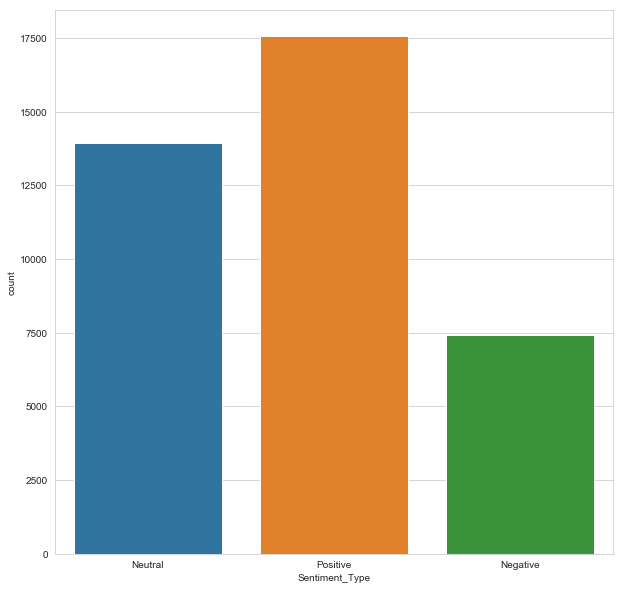

In [59]:
bloblist_tags = list()

df_gb_tags_str=df_gb['tags']
for row in df_gb_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_gb_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_gb_polarity_tags):
    if df_gb_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_gb_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_gb_polarity_tags['Sentiment_Type'] = df_gb_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_gb_polarity_tags)

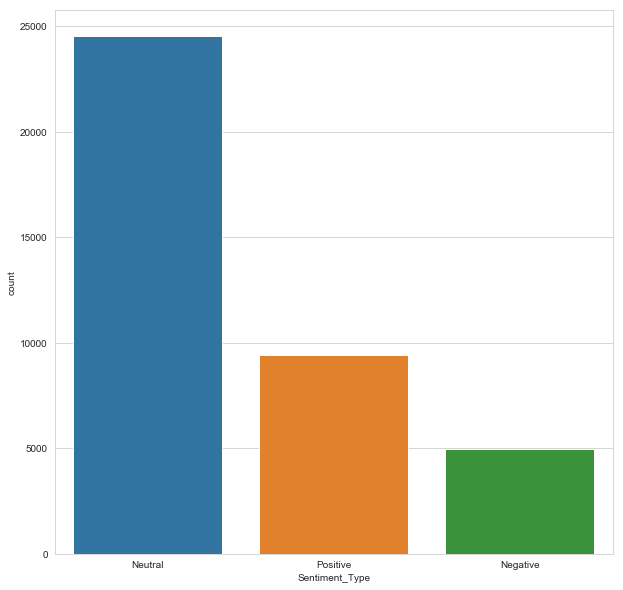

In [60]:
bloblist_title = list()

df_gb_title_str=df_gb['title']
for row in df_gb_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_gb_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_gb_polarity_title):
    if df_gb_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_gb_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_gb_polarity_title['Sentiment_Type'] = df_gb_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_gb_polarity_title)

### Working on India Dataset

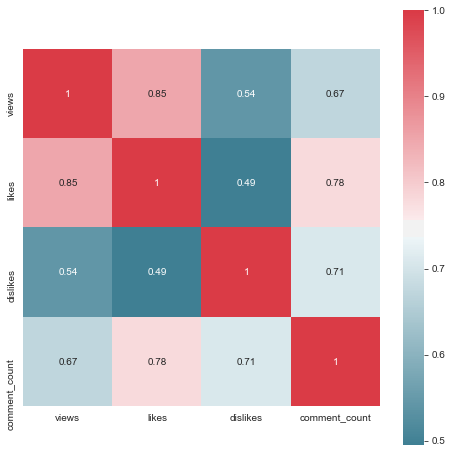

In [61]:
f3, ax3 = plt.subplots(figsize=(8, 8))
corr3 = df_in[columns_show].corr()
sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax3,annot=True)

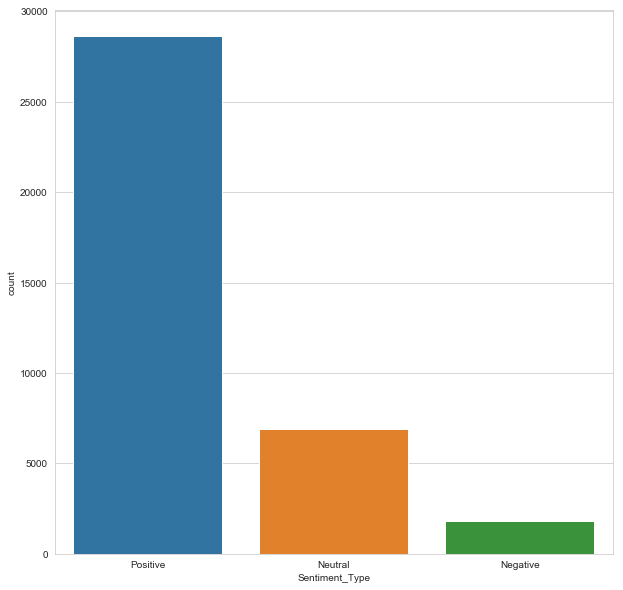

In [62]:
bloblist_desc = list()

df_in_descr_str=df_in['description'].astype(str)
for row in df_in_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_in_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_in_polarity_desc):
    if df_in_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_in_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_in_polarity_desc['Sentiment_Type'] = df_in_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_in_polarity_desc)

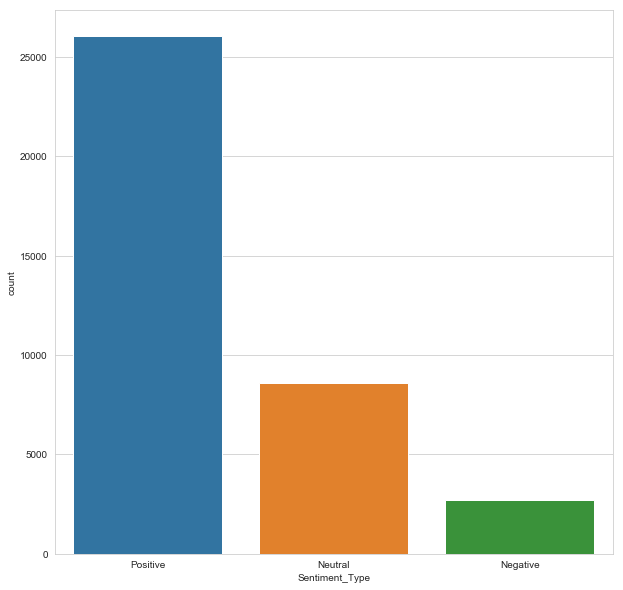

In [63]:
bloblist_tags = list()

df_in_tags_str=df_in['tags']
for row in df_in_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_in_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_in_polarity_tags):
    if df_in_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_in_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_in_polarity_tags['Sentiment_Type'] = df_in_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_in_polarity_tags)

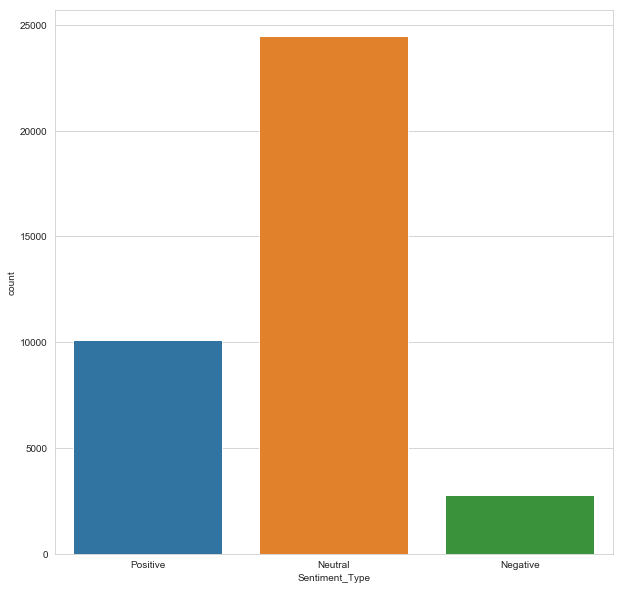

In [64]:
bloblist_title = list()

df_in_title_str=df_in['title']
for row in df_in_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_in_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_in_polarity_title):
    if df_in_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_in_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_in_polarity_title['Sentiment_Type'] = df_in_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_in_polarity_title)